<hr style="height:5px;border-width:0;color:orange;background-color:orange">
    <center> <span style="font-size: 38px;"> Obesity dataset </span> </center>

+ Author: **Alejandro Sánchez Silvestre**
+ Date: **April 2024**
+ Module: **Clustering / Classification**

<hr style="height:5px;border-width:0;color:orange;background-color:orange">

About Dataset
The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records.
The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS)
variables obtained :
Gender, Age, Height and Weight.

NObesity values are:

•Underweight Less than 18.5
•Normal 18.5 to 24.9
•Overweight 25.0 to 29.9
•Obesity I 30.0 to 34.9
•Obesity II 35.0 to 39.9
•Obesity III Higher than 40

The data contains numerical data and continous data, so it can be used for analysis based on algorithms of classification, prediction, segmentation and association. Data is available in CSV format.

<a id='seccion1'></a>
# **1. Libraries**
<hr style="height:5px;border-width:0;color:orange;background-color:orange">

In [532]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import skimpy as sk


import warnings 
warnings.filterwarnings('ignore')


In [533]:
# load the data getting rid of the id column

train = pd.read_csv('train.csv',index_col='id').reset_index(drop=True)
test = pd.read_csv('test.csv',index_col='id').reset_index(drop=True) 


pd.set_option('float', '{:.2f}'.format)
train

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0        Male 24.44    1.70   81.67                            yes  yes  2.00   
1      Female 18.00    1.56   57.00                            yes  yes  2.00   
2      Female 18.00    1.71   50.17                            yes  yes  1.88   
3      Female 20.95    1.71  131.27                            yes  yes  3.00   
4        Male 31.64    1.91   93.80                            yes  yes  2.68   
...       ...   ...     ...     ...                            ...  ...   ...   
20753    Male 25.14    1.77  114.19                            yes  yes  2.92   
20754    Male 18.00    1.71   50.00                             no  yes  3.00   
20755    Male 20.10    1.82  105.58                            yes  yes  2.41   
20756    Male 33.85    1.70   83.52                            yes  yes  2.67   
20757    Male 26.68    1.82  118.13                            yes  yes  3.00   

       NCP        CAEC SMOKE  CH2O SCC  FAF  TUE       CALC  \
0     2.98   Sometimes    no  2.76  no 0.00 0.98  Sometimes   
1     3.00  Frequently    no  2.00  no 1.00 1.00         no   
2     1.41   Sometimes    no  1.91  no 0.87 1.67         no   
3     3.00   Sometimes    no  1.67  no 1.47 0.78  Sometimes   
4     1.97   Sometimes    no  1.98  no 1.97 0.93  Sometimes   
...    ...         ...   ...   ...  ..  ...  ...        ...   
20753 3.00   Sometimes    no  2.15  no 1.33 0.20  Sometimes   
20754 4.00  Frequently    no  1.00  no 2.00 1.00  Sometimes   
20755 3.00   Sometimes    no  2.00  no 1.16 1.20         no   
20756 1.97   Sometimes    no  2.14  no 0.00 0.97         no   
20757 3.00   Sometimes    no  2.00  no 0.68 0.71  Sometimes   

                      MTRANS           NObeyesdad  
0      Public_Transportation  Overweight_Level_II  
1                 Automobile        Normal_Weight  
2      Public_Transportation  Insufficient_Weight  
3      Public_Transportation     Obesity_Type_III  
4      Public_Transportation  Overweight_Level_II  
...                      ...                  ...  
20753  Public_Transportation      Obesity_Type_II  
20754  Public_Transportation  Insufficient_Weight  
20755  Public_Transportation      Obesity_Type_II  
20756             Automobile  Overweight_Level_II  
20757  Public_Transportation      Obesity_Type_II  

[20758 rows x 17 columns]

In [534]:
# check nulls and duplicated values
print(train.isnull().sum().sum())
print(train.duplicated().sum())

0
0


In [535]:
# change the columns names into more undestandables ones

train.columns= ['gender', 'age', 'height', 'weight', 'family_history_with_overweight',
       'hipercaloric_meals', 'veg_freq', 'daily_meals', 'snacks_freq', 'smoke', 'daily_water', 'cal_monitor', 'workout_freq', 'screen_time',
       'alcohol_comp', 'transportation_mode', 'obesity_class']

<a id='seccion2'></a>
# **2. Univariable EDA**
<hr style="height:5px;border-width:0;color:orange;background-color:orange">

## Exploration of columns in dataset

- **gender**: Binary categorical column representing the person's sex.

- **age**: Numeric column representing the person's age, in float format, so we will round to the nearest integer. Data ranges between 14 and 61 years old.
- **height**: Numeric column representing the person's height. Data ranges between 1.45 and 1.98 meters.
- **family_history_with_overweight**: Binary column representing whether there is a family history of overweight.
- **hipercaloric_meals**: Binary column representing frequent consumption of hypercaloric meals. Previously 'FAVC'.
- **veg_freq**: Numeric column representing the weekly frequency of vegetable consumption. Previously 'FCVC'.
- **daily_meals**: Numeric column representing the number of meals per day. Previously 'NCP'.
- **snacks_freq**: Categorical column representing snack frequency between meals. Data varies between: 'Sometimes', 'Frequently', 'Always', 'no'. Previously 'CAEC'.
- **smoke**: Binary column representing whether the person is a smoker (yes/no).
- **daily_water**: Numeric column representing daily water consumption, values range between 1.0 and 3.0 liters. Previously 'CH2O'.
- **cal_monitor**: Binary column representing whether the person monitors calorie consumption (yes/no). Previously 'SCC'.
- **workout_freq**: Numeric column representing the weekly frequency of physical activity, values range between 0 and 3. Previously 'FAF'.
- **screen_time**: Numeric column representing the time spent using technological devices per day (mobile, television, internet). Values range between 0 and 2 hours. Previously 'TUE'.
- **alcohol_comp**: Categorical column representing how often alcohol is consumpted. Values range between: 'no', 'Sometimes', 'Frequently', 'Always'. Previously 'CALC'.
- **transportation_mode**: Categorical column representing the type of transportation used. Values range between: 'Public_Transportation', 'Walking', 'Automobile', 'Motorbike', 'Bike'. Previously 'MTRANS'.
- **obesity_class**: Categorical column representing the classification of obesity type based on BMI (Body Mass Index). Values vary between: 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_III'. Previously 'NObeyesdad'.

According to BMI, the classification of obesity responds to the following scheme:

    • Underweight: Less than 18.5
    • Normal: 18.5 to 24.9
    • Overweight: 25.0 to 29.9
    • Obesity I: 30.0 to 34.9
    • Obesity II: 35.0 to 39.9
    • Obesity III: Higher than 40


In [536]:
# brief dive into variables

display(train.describe(include='all'))

sk.skim(train)

gender      age   height   weight family_history_with_overweight  \
count    20758 20758.00 20758.00 20758.00                          20758   
unique       2      NaN      NaN      NaN                              2   
top     Female      NaN      NaN      NaN                            yes   
freq     10422      NaN      NaN      NaN                          17014   
mean       NaN    23.84     1.70    87.89                            NaN   
std        NaN     5.69     0.09    26.38                            NaN   
min        NaN    14.00     1.45    39.00                            NaN   
25%        NaN    20.00     1.63    66.00                            NaN   
50%        NaN    22.82     1.70    84.06                            NaN   
75%        NaN    26.00     1.76   111.60                            NaN   
max        NaN    61.00     1.98   165.06                            NaN   

       hipercaloric_meals  veg_freq  daily_meals snacks_freq  smoke  \
count               20758  20758.00     20758.00       20758  20758   
unique                  2       NaN          NaN           4      2   
top                   yes       NaN          NaN   Sometimes     no   
freq                18982       NaN          NaN       17529  20513   
mean                  NaN      2.45         2.76         NaN    NaN   
std                   NaN      0.53         0.71         NaN    NaN   
min                   NaN      1.00         1.00         NaN    NaN   
25%                   NaN      2.00         3.00         NaN    NaN   
50%                   NaN      2.39         3.00         NaN    NaN   
75%                   NaN      3.00         3.00         NaN    NaN   
max                   NaN      3.00         4.00         NaN    NaN   

        daily_water cal_monitor  workout_freq  screen_time alcohol_comp  \
count      20758.00       20758      20758.00     20758.00        20758   
unique          NaN           2           NaN          NaN            3   
top             NaN          no           NaN          NaN    Sometimes   
freq            NaN       20071           NaN          NaN        15066   
mean           2.03         NaN          0.98         0.62          NaN   
std            0.61         NaN          0.84         0.60          NaN   
min            1.00         NaN          0.00         0.00          NaN   
25%            1.79         NaN          0.01         0.00          NaN   
50%            2.00         NaN          1.00         0.57          NaN   
75%            2.55         NaN          1.59         1.00          NaN   
max            3.00         NaN          3.00         2.00          NaN   

          transportation_mode     obesity_class  
count                   20758             20758  
unique                      5                 7  
top     Public_Transportation  Obesity_Type_III  
freq                    16687              4046  
mean                      NaN               NaN  
std                       NaN               NaN  
min                       NaN               NaN  
25%                       NaN               NaN  
50%                       NaN               NaN  
75%                       NaN               NaN  
max                       NaN               NaN

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 20758  │ │ string      │ 9     │                                                          │
│ │ Number of columns │ 17     │ │ float64     │ 8     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %   ┃ mean   ┃ sd       ┃ p0    ┃ p25     ┃ p50    ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ age               │    0 │      0 │     24 │      5.7 │    14 │      20 │     23 │    26 │    61 │  ▇▇▂▁   │  │
│ │ height            │    0 │      0 │    1.7 │    0.087 │   1.4 │     1.6 │    1.7 │   1.8 │     2 │  ▁▅▇▇▃  │  │
│ │ weight            │    0 │      0 │     88 │       26 │    39 │      66 │     84 │   110 │   170 │  ▅▇▅▇▂  │  │
│ │ veg_freq          │    0 │      0 │    2.4 │     0.53 │     1 │       2 │    2.4 │     3 │     3 │    ▇▁▇  │  │
│ │ daily_meals       │    0 │      0 │    2.8 │     0.71 │     1 │       3 │      3 │     3 │     4 │ ▁  ▁▇▁  │  │
│ │ daily_water       │    0 │      0 │      2 │     0.61 │     1 │     1.8 │      2 │   2.5 │     3 │ ▃▁▁▇▂▃  │  │
│ │ workout_freq      │    0 │      0 │   0.98 │     0.84 │     0 │   0.008 │      1 │   1.6 │     3 │ ▇▃▇▂▃▁  │  │
│ │ screen_time       │    0 │      0 │   0.62 │      0.6 │     0 │       0 │   0.57 │     1 │     2 │ ▇▂▂▅▁▁  │  │
│ └───────────────────┴──────┴────────┴────────┴──────────┴───────┴─────────┴────────┴───────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                           ┃ NA    ┃ NA %      ┃ words per row            ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ gender                                │     0 │         0 │                        1 │               20758 │  │
│ │ family_history_with_overweight        │     0 │         0 │                        1 │               20758 │  │
│ │ hipercaloric_meals                    │     0 │         0 │                        1 │               20758 │  │
│ │ snacks_freq                           │     0 │         0 │                        1 │               20758 │  │
│ │ smoke                                 │     0 │         0 │                        1 │               20758 │  │
│ │ cal_monitor                           │     0 │         0 │                        1 │               20758 │  │
│ │ alcohol_comp                          │     0 │         0 │                        1 │               20758 │  │
│ │ transportation_mode                   │     0 │         0 │                        1 │               20758 │  │
│ │ obesity_class                         │     0 │         0 │                        1 │               20758 │  │
│ └───────────────────────────────────────┴───────┴─────

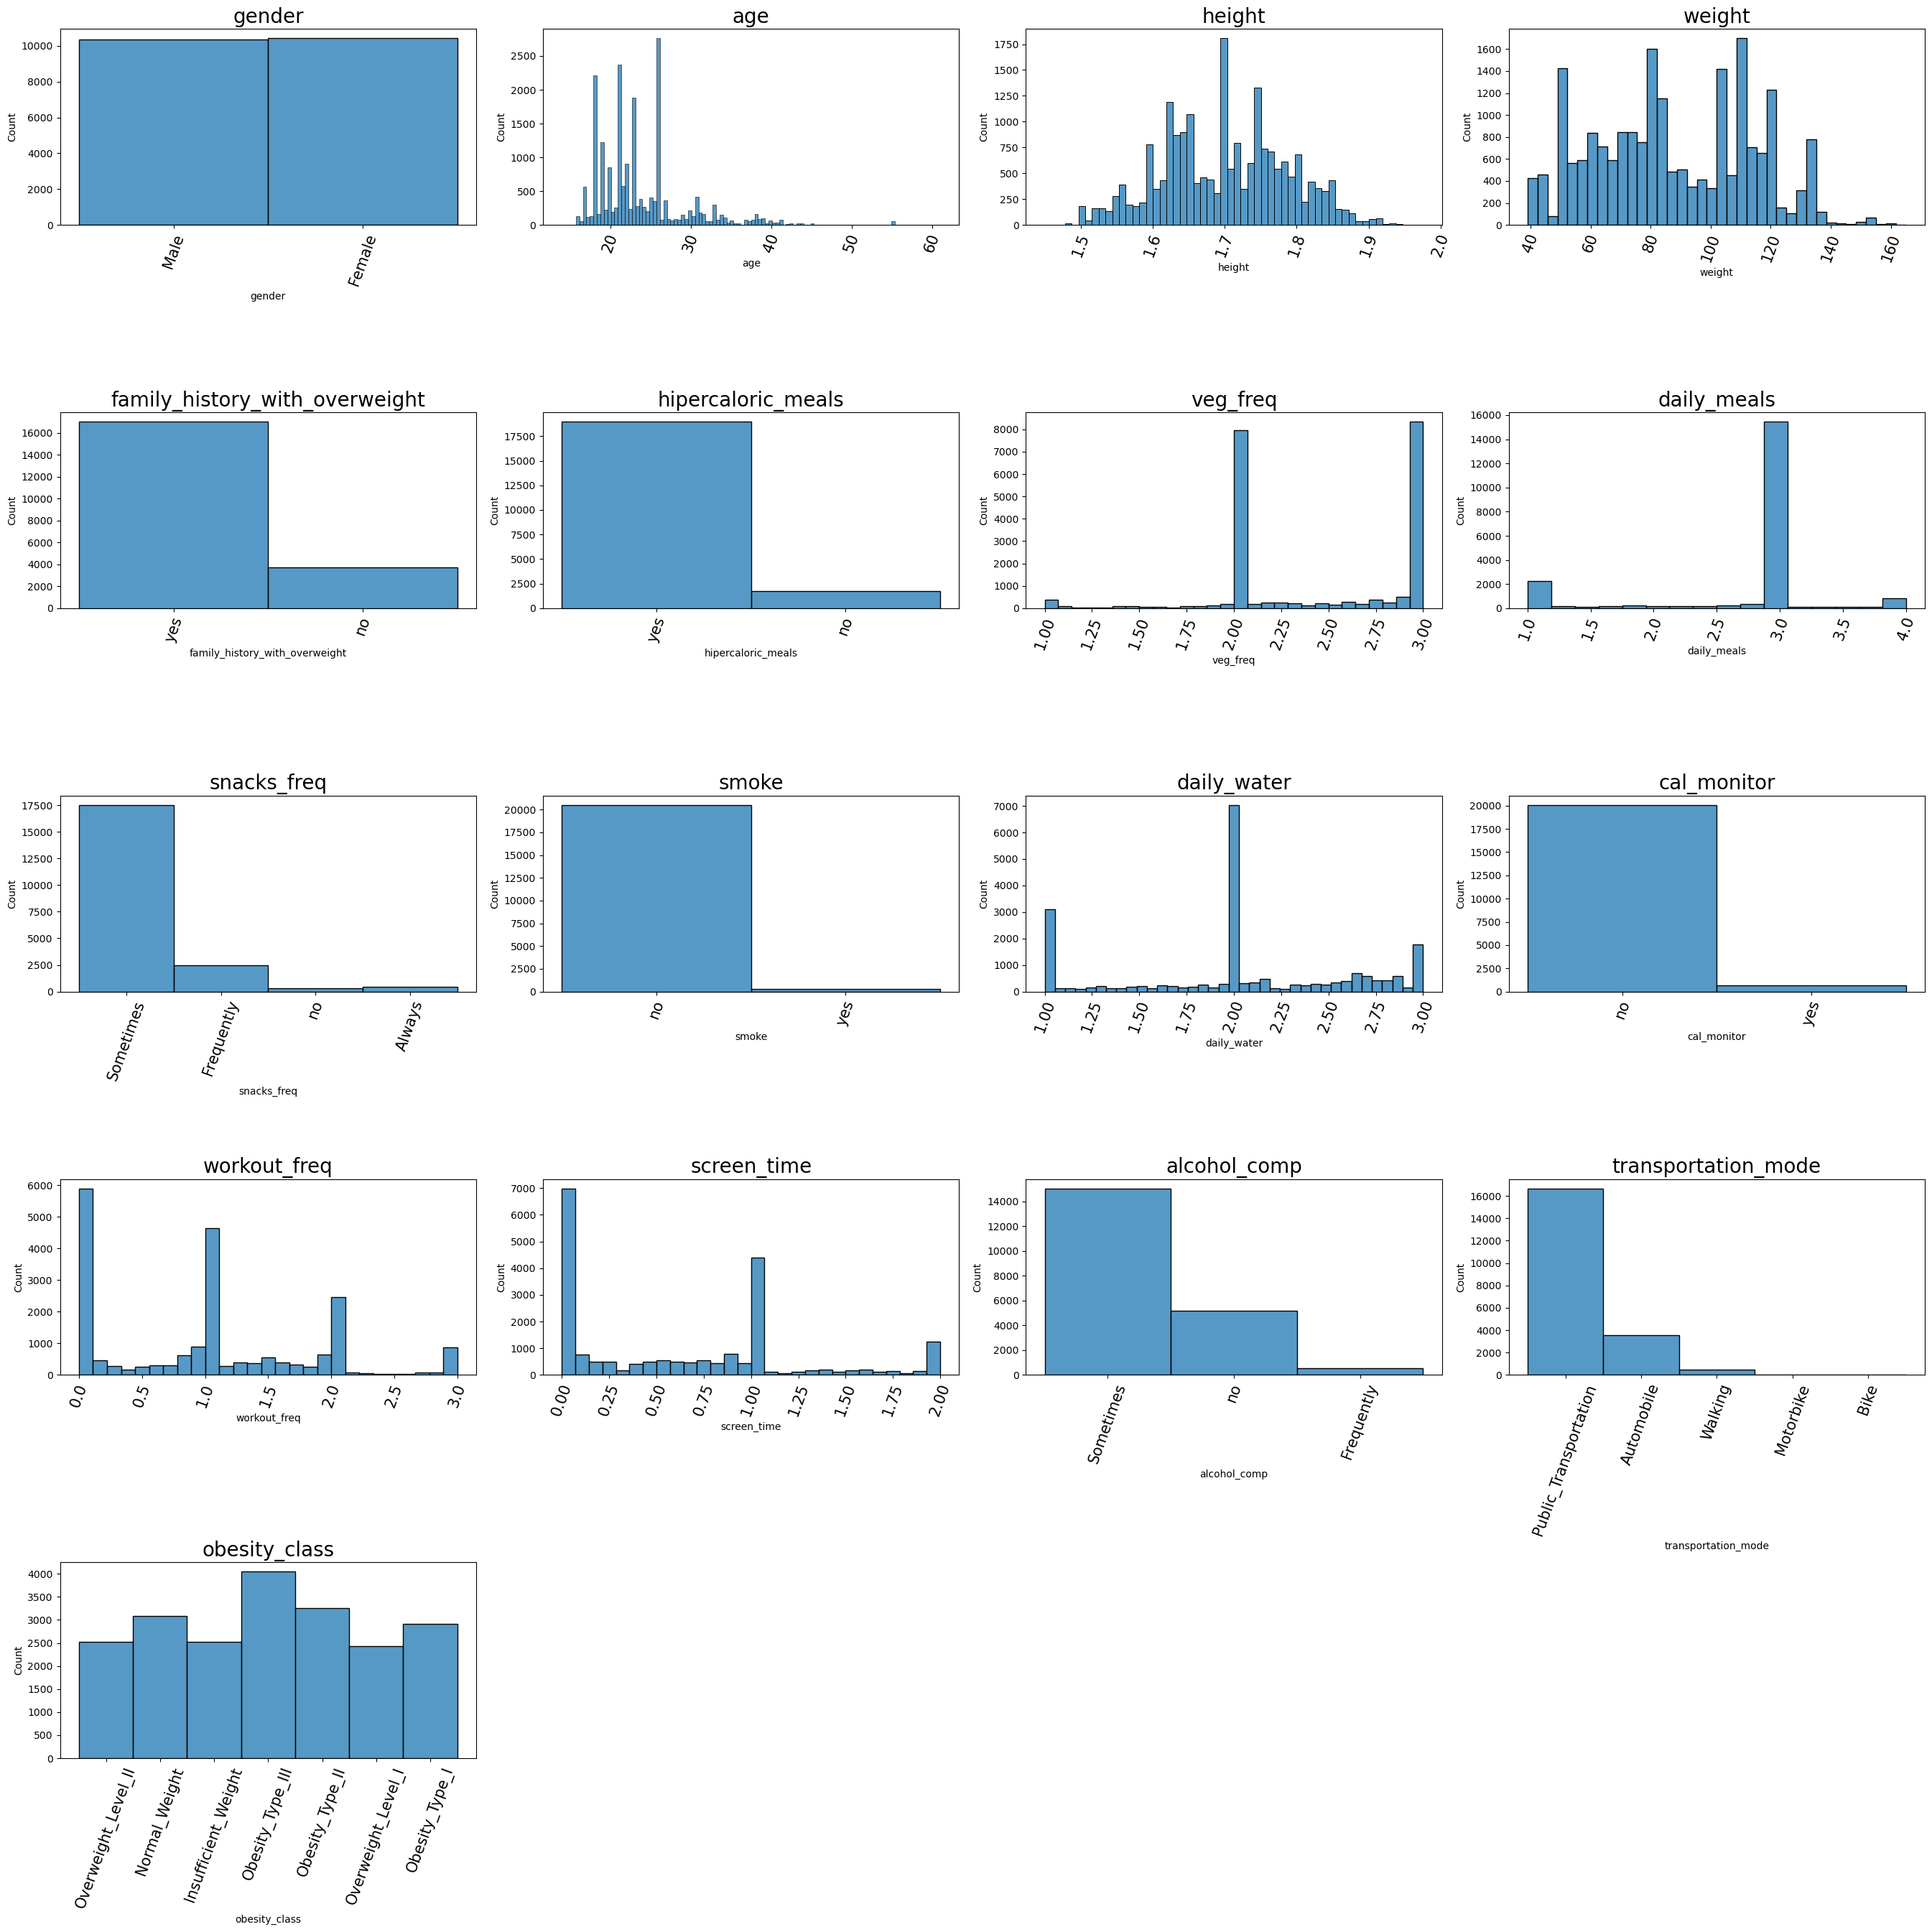

In [537]:

plt.figure(figsize=(27,27))
for i, col in enumerate(train.columns):
    plt.subplot(5,4,i+1)
    sns.histplot(data= train,x=col)
    plt.xticks(rotation=70,fontsize=15)
    plt.title(col,fontsize=20)
    plt.tight_layout()

**Comments**

---

Out sample is well balanced regarding the sex column. The most part of the age samples are located in the young age (20-30 Years old) as well as the overweigth family history and the hipercaloric meals ingest.

Many of the individuals in the sample have bad habits such as no workout at all, public trasport and private car as transportation and the use of alcohol in a frequent basis.

Others varibales as height and weight follows a normal distribution.

Target column is more or less regularly distributed along all the classes in target feature, having 'Obesity_type_III' the highest value (aprox 20% of target feature)

It's remarkable many of the numeric variables (float numbers) they're actually categorical features but need to be converted into the correct format(i.e: workout_freq, daily_meals or veg_freq.)

Another comment to smoke and cal_monitor that surprisingly the result is odd as I was expecting more people to smoke of monitor the calories.



<a id='seccion3'></a>
# **3. Bivariable EDA**
<hr style="height:5px;border-width:0;color:orange;background-color:orange">

Before proceding to the bi-variable EDA let´s take a minute to transform correctly the type and format of the features.

Some of continous features are actually categorical feature (workout_freq, daily_meals...)

In [538]:
train['workout_freq']= train['workout_freq'].round(0).astype(int)
train['daily_meals'] = train['daily_meals'].round(0).astype(int)
train['veg_freq'] = train['veg_freq'].round(0).astype(int)

In [539]:
train['workout_freq'].describe()

count   20758.00
mean        0.99
std         0.87
min         0.00
25%         0.00
50%         1.00
75%         2.00
max         3.00
Name: workout_freq, dtype: float64

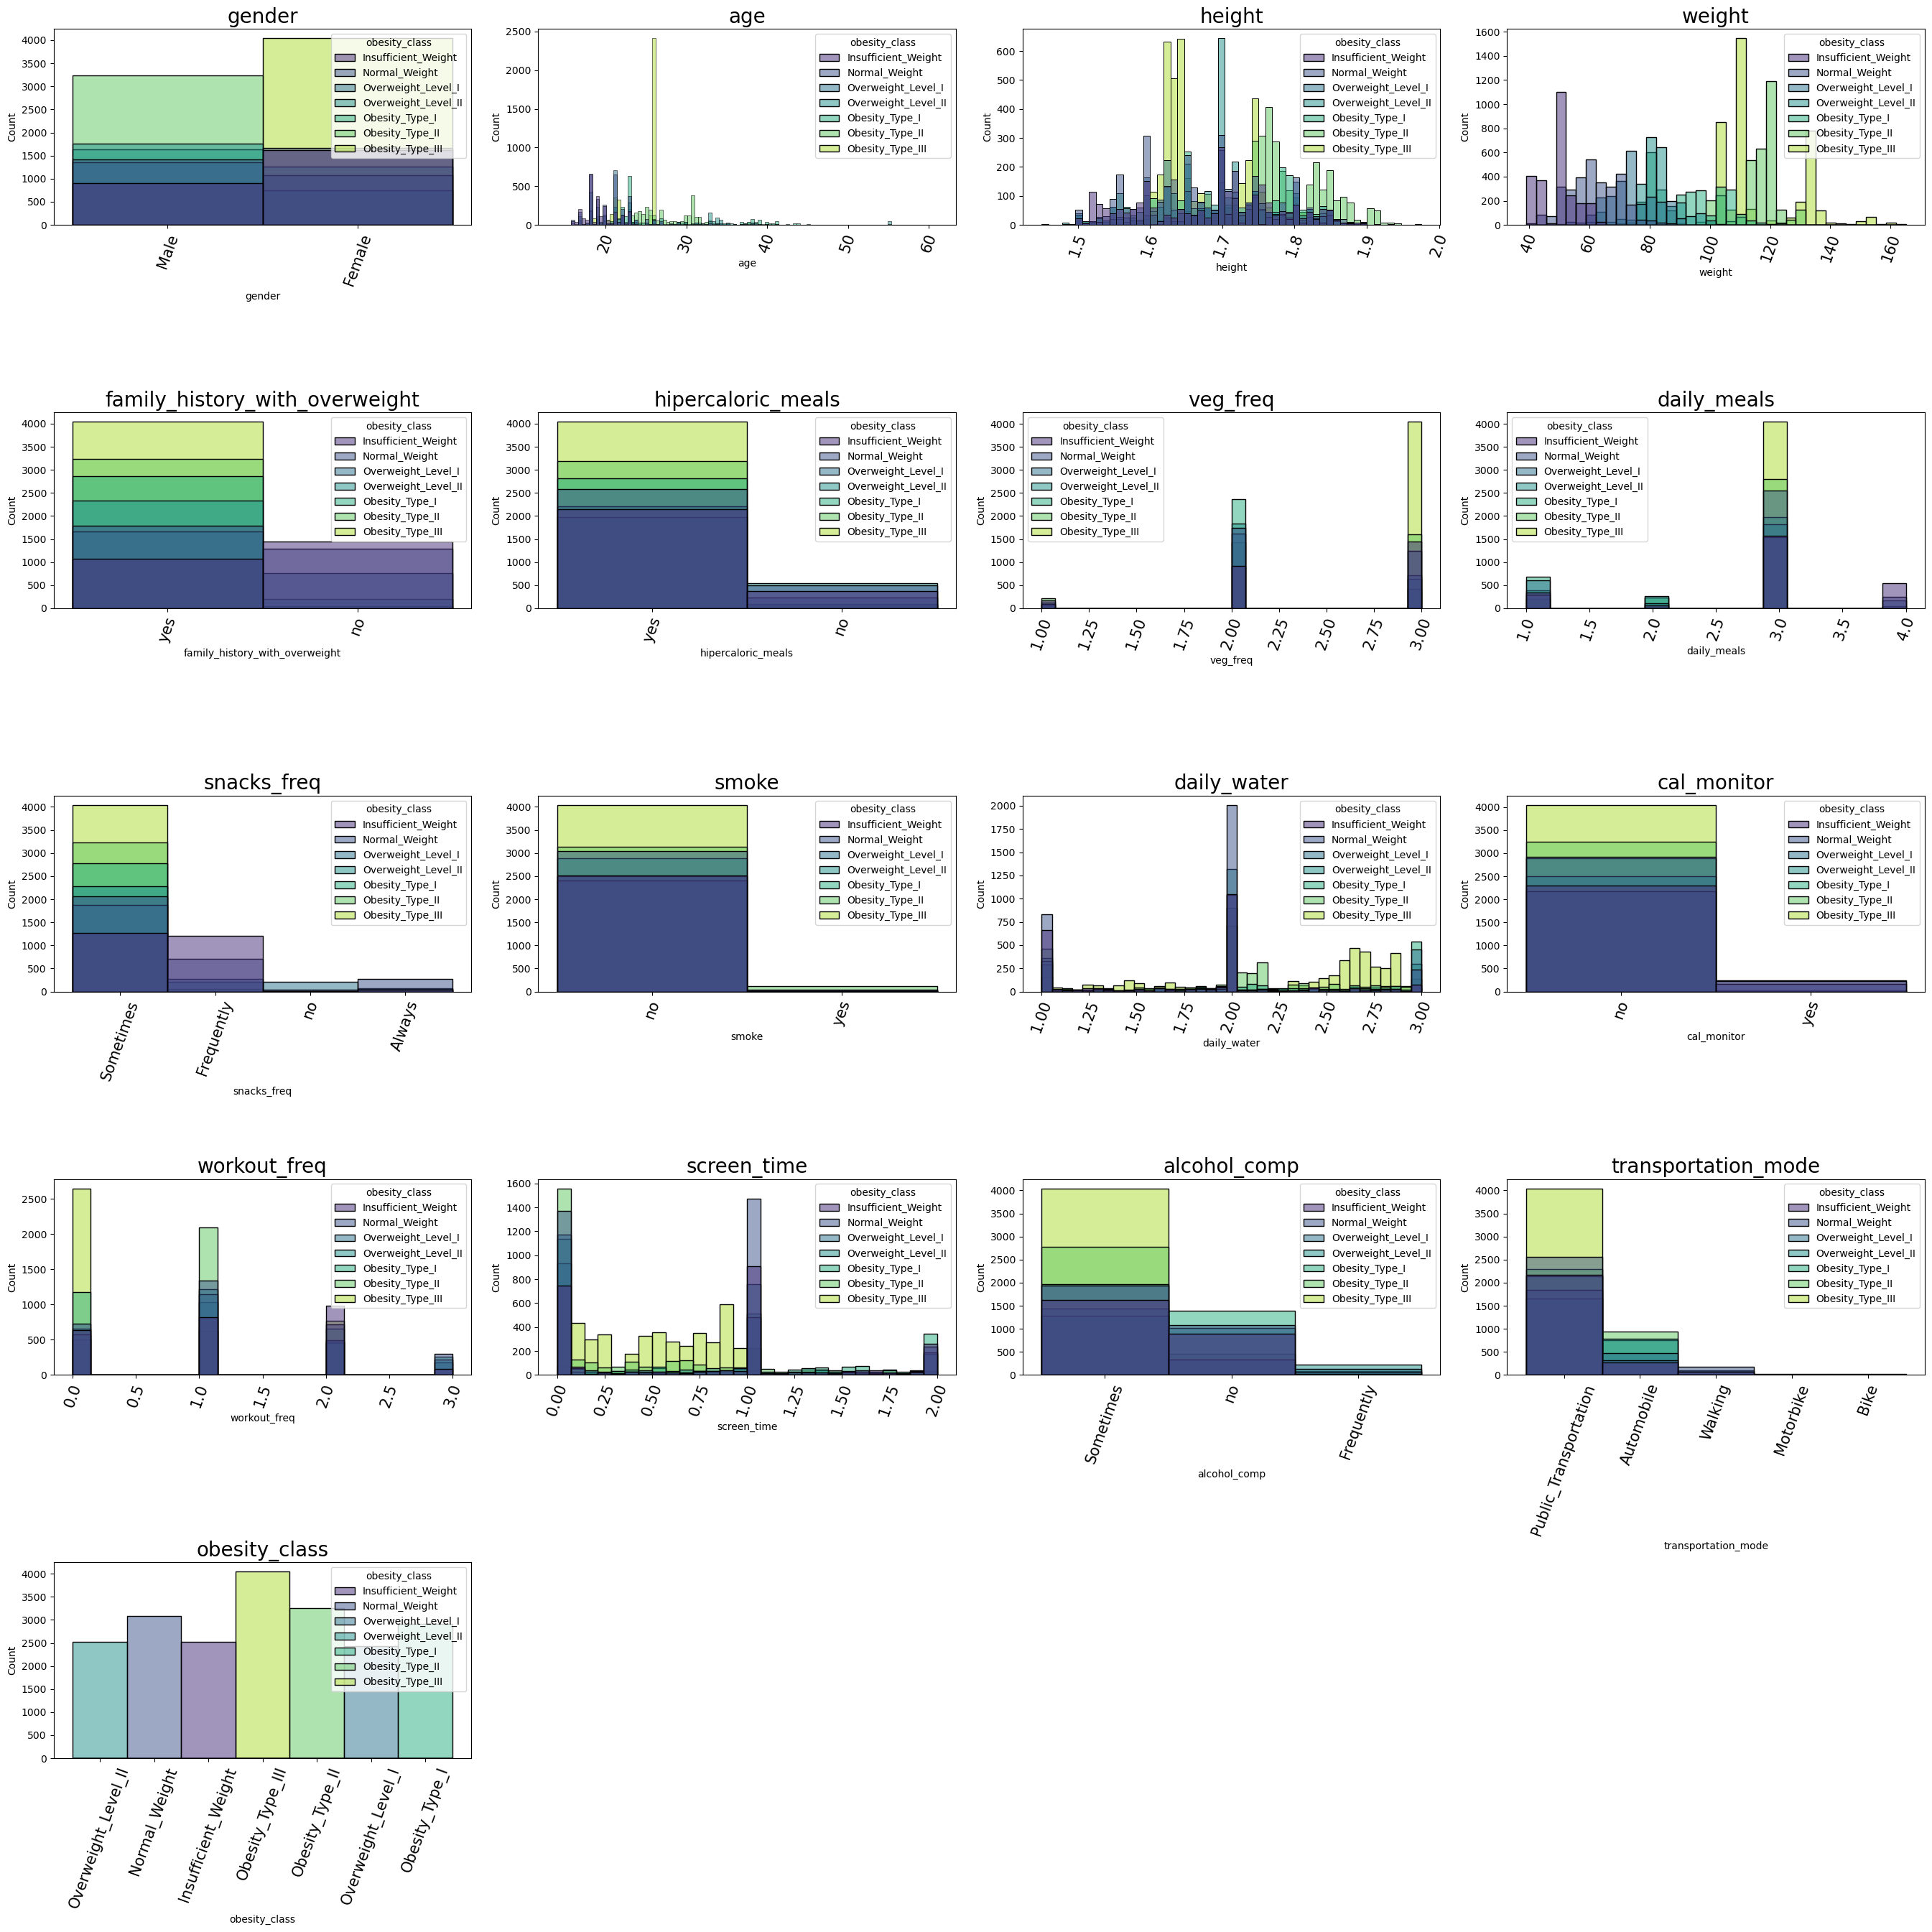

In [540]:

# Dive into distribution of target feature along the rest of features

plt.figure(figsize=(27,27))
for i, col in enumerate(train.columns):
    plt.subplot(5,4,i+1)
    sns.histplot(data= train,x=col,hue='obesity_class',palette='viridis',
                 hue_order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
    plt.xticks(rotation=70,fontsize=15)
    plt.title(col,fontsize=20)
    plt.tight_layout()

**Comments**

---

We can tell a significant disparity in the distribution of the target across key features such as family_history_with_overweight, hipercaloric_meals, snacks_freq, daily_alcohol and transportation_mode that the higher index for obesity class cumulates along bad habits and maybe genetical factors(family_history_with_overweight). 

We'll keep this insight for late analysis as it makes sense that a person could tend to be overweight/obese when his lifestyle and habits are not healthy.

Also there is diferences between sex, age and height.


## **3.1 Scatter plots 3D**
<hr style="height:5px;border-width:0;color:orange;background-color:orange">


The purpose of these plots is to understand better the underlying relationships that lies bellow the target feature along diferents variables. We will look into the two basic variables that define the Obesity_class (weight&height) and how affect the gender an de age in the distribution on the target feature.


After a quick look we can tell high values of obesity types  (III) are more distrubuted in the female gender and regarding the age, higher obesity clases are more prone to be in younger ages more than in the elders (caption: our data is highly unbalanced in the age variable having more young people represented)

In [541]:
# visualization of distribution of the target feature along height,weight and gender variables.

color_sequence = px.colors.sequential.Viridis  

fig = px.scatter_3d(train, x='gender', y='height', z='weight', color='obesity_class',
                    color_discrete_sequence=color_sequence,  
                    category_orders={'obesity_class': ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
                                                       'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']},
                    height=1000, width=1000)

fig.show()


In [542]:
# visualization of same plot with age in z ax.


color_sequence = px.colors.sequential.Viridis  

fig = px.scatter_3d(train, x='height', y='weight', z='age', color='obesity_class',
                    color_discrete_sequence=color_sequence, 
                    category_orders={'obesity_class': ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
                                                       'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']},
                    height=1000, width=1000)

fig.show()


<a id='seccion4'></a>
# **4. Feature engeneering**
<hr style="height:5px;border-width:0;color:orange;background-color:orange">


we will create some extra feature in order to get a proper analysis between variables as target column obesity_class actually contains 3 classes itself (not-overweigth/obese, overweight and obese).

This will help us to understand the real correlation bewteen all the features.

The new features to be created:

- BMI: body-mass index, a common score to mesure obesity.
- good Habits: it'll be a score from 0-4 of as an index of good habits, 0 means no good habits and 4 very good habits. We will extract it from ['hipercaloric_meals', 'snacks_freq', 'workout_freq' and 'daily_alcohol']
- normal_weight
- is_overweight
- is_obese

In [543]:
# some feature engeneering in order to capture BMI and good habits

# CREATION OF BMI feature, The formula is BMI = kg/m2
train['BMI']= train['weight']/(train['height'])**2


# CREATION OF GOOD_HABITS feature ['hipercaloric_meals', 'snacks_freq', 'workout_freq','daily_alcohol', 'transportation_mode']

good_habits = []

# Iterate over each row in the DataFrame as a Series object
for index, row in train.iterrows():
    counter = 0
    # Check 'hipercaloric_meals'
    if row['hipercaloric_meals'] != 'yes':
        counter += 1

    # Check 'snacks_freq' is 'no'
    if row['snacks_freq'] == 'no':
        counter += 1

    # Check 'workout_freq' is 2 or more
    if row['workout_freq'] >= 2:
        counter += 1

    # Check 'daily_alcohol' is 'no'
    if row['alcohol_comp'] == 'no':
        counter += 1

    # Append the count of good habits to the list
    good_habits.append(counter)

    
# add result to df

train['good_habits'] = good_habits

# CREATION OF NORMAL_WEIGHT feature incluiding the underweight and normal weight classes

normal_weight = []

for index, row in train.iterrows():
    # check if the person is normal weight
    if row['obesity_class'] in ['Insufficient_Weight','Normal_Weight']:
        normal_weight.append(True)
    else:
        normal_weight.append(False)
train['normal_weight']= normal_weight

# CREATION OF IS_OVERWEIGHT feature
is_overweight = []
for index, row in train.iterrows():
    # check if the person is overweight
    if row['obesity_class'] in ['Overweight_Level_I','Overweight_Level_II']:
        is_overweight.append(True)

    else: 
        is_overweight.append(False)

train['is_overweight']= is_overweight



# CREATION OF IS_OBESE feature
is_obese = []
for index, row in train.iterrows():
    # check if the person is obese
    if row['obesity_class'] in ['Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']:
        is_obese.append(True)
    else:
        is_obese.append(False)

train['is_obese']= is_obese


# order the columns having obesity class in last position

train= train[['gender', 'age', 'height', 'weight', 'family_history_with_overweight',
            'hipercaloric_meals', 'veg_freq', 'daily_meals', 'snacks_freq', 'smoke',
            'daily_water', 'cal_monitor', 'workout_freq', 'screen_time',
            'alcohol_comp', 'transportation_mode', 'BMI',
            'good_habits','normal_weight','is_overweight','is_obese','obesity_class']]

train

gender   age  height  weight family_history_with_overweight  \
0        Male 24.44    1.70   81.67                            yes   
1      Female 18.00    1.56   57.00                            yes   
2      Female 18.00    1.71   50.17                            yes   
3      Female 20.95    1.71  131.27                            yes   
4        Male 31.64    1.91   93.80                            yes   
...       ...   ...     ...     ...                            ...   
20753    Male 25.14    1.77  114.19                            yes   
20754    Male 18.00    1.71   50.00                             no   
20755    Male 20.10    1.82  105.58                            yes   
20756    Male 33.85    1.70   83.52                            yes   
20757    Male 26.68    1.82  118.13                            yes   

      hipercaloric_meals  veg_freq  daily_meals snacks_freq smoke  \
0                    yes         2            3   Sometimes    no   
1                    yes         2            3  Frequently    no   
2                    yes         2            1   Sometimes    no   
3                    yes         3            3   Sometimes    no   
4                    yes         3            2   Sometimes    no   
...                  ...       ...          ...         ...   ...   
20753                yes         3            3   Sometimes    no   
20754                yes         3            4  Frequently    no   
20755                yes         2            3   Sometimes    no   
20756                yes         3            2   Sometimes    no   
20757                yes         3            3   Sometimes    no   

       daily_water cal_monitor  workout_freq  screen_time alcohol_comp  \
0             2.76          no             0         0.98    Sometimes   
1             2.00          no             1         1.00           no   
2             1.91          no             1         1.67           no   
3             1.67          no             1         0.78    Sometimes   
4             1.98          no             2         0.93    Sometimes   
...            ...         ...           ...          ...          ...   
20753         2.15          no             1         0.20    Sometimes   
20754         1.00          no             2         1.00    Sometimes   
20755         2.00          no             1         1.20           no   
20756         2.14          no             0         0.97           no   
20757         2.00          no             1         0.71    Sometimes   

         transportation_mode   BMI  good_habits  normal_weight  is_overweight  \
0      Public_Transportation 28.26            0          False           True   
1                 Automobile 23.42            1           True          False   
2      Public_Transportation 17.13            1           True          False   
3      Public_Transportation 44.86            0          False          False   
4      Public_Transportation 25.60            1          False           True   
...                      ...   ...          ...            ...            ...   
20753  Public_Transportation 36.59            0          False          False   
20754  Public_Transportation 17.10            1           True          False   
20755  Public_Transportation 31.89            1          False          False   
20756             Automobile 28.90            1          False           True   
20757  Public_Transportation 35.80            0          False          False   

       is_obese        obesity_class  
0         False  Overweight_Level_II  
1         False        Normal_Weight  
2         False  Insufficient_Weight  
3          True     Obesity_Type_III  
4         False  Overweight_Level_II  
...         ...                  ...  
20753      True      Obesity_Type_II  
20754     False  Insufficient_Weight  
20755      True      Obesity_Type_II  
20756     False  Overweight_Level_II  
20757      True      Obesity_Type_II  

[20758


<a id='seccion5'></a>
# **5. Encoding**
<hr style="height:5px;border-width:0;color:orange;background-color:orange">

As the input in the Machine Learning models must be numerical, we will encode all the non-numerical features. We could use OneHotEncoding for this, but let's use the logic behind the features.

First we will encode the target acording to an increasing order ('Insufficient_Weight':0 --> 'Obesity_Type_III':6) as higher levels will be associated with higher BMI.

The categorical features are divided between boolean and frecuency values(these ones order is important)
- Boolean: 'gender', 'family_history_with_overweight', 'hipercaloric_meals', 'smoke' and 'cal_monitor'
- Frequency:'snacks_freq','alcohol_comp','transportation_mode'. We will associate lower values with healthier habits, i.e:'snacks_freq':{'no':0,'Sometimes':1,'Frequently':2,'Always':3}




In [544]:
# encoding the target variable

obesity_class_mapping= {'Insufficient_Weight':0,
                'Normal_Weight':1,
                'Overweight_Level_I':2,
                'Overweight_Level_II':3,
                'Obesity_Type_I':4,
                'Obesity_Type_II':5,
                'Obesity_Type_III':6
                }

# Apply the mapping to the target variable
train['obesity_class'] = train['obesity_class'].map(order_mapping)
train


gender   age  height  weight family_history_with_overweight  \
0        Male 24.44    1.70   81.67                            yes   
1      Female 18.00    1.56   57.00                            yes   
2      Female 18.00    1.71   50.17                            yes   
3      Female 20.95    1.71  131.27                            yes   
4        Male 31.64    1.91   93.80                            yes   
...       ...   ...     ...     ...                            ...   
20753    Male 25.14    1.77  114.19                            yes   
20754    Male 18.00    1.71   50.00                             no   
20755    Male 20.10    1.82  105.58                            yes   
20756    Male 33.85    1.70   83.52                            yes   
20757    Male 26.68    1.82  118.13                            yes   

      hipercaloric_meals  veg_freq  daily_meals snacks_freq smoke  \
0                    yes         2            3   Sometimes    no   
1                    yes         2            3  Frequently    no   
2                    yes         2            1   Sometimes    no   
3                    yes         3            3   Sometimes    no   
4                    yes         3            2   Sometimes    no   
...                  ...       ...          ...         ...   ...   
20753                yes         3            3   Sometimes    no   
20754                yes         3            4  Frequently    no   
20755                yes         2            3   Sometimes    no   
20756                yes         3            2   Sometimes    no   
20757                yes         3            3   Sometimes    no   

       daily_water cal_monitor  workout_freq  screen_time alcohol_comp  \
0             2.76          no             0         0.98    Sometimes   
1             2.00          no             1         1.00           no   
2             1.91          no             1         1.67           no   
3             1.67          no             1         0.78    Sometimes   
4             1.98          no             2         0.93    Sometimes   
...            ...         ...           ...          ...          ...   
20753         2.15          no             1         0.20    Sometimes   
20754         1.00          no             2         1.00    Sometimes   
20755         2.00          no             1         1.20           no   
20756         2.14          no             0         0.97           no   
20757         2.00          no             1         0.71    Sometimes   

         transportation_mode   BMI  good_habits  normal_weight  is_overweight  \
0      Public_Transportation 28.26            0          False           True   
1                 Automobile 23.42            1           True          False   
2      Public_Transportation 17.13            1           True          False   
3      Public_Transportation 44.86            0          False          False   
4      Public_Transportation 25.60            1          False           True   
...                      ...   ...          ...            ...            ...   
20753  Public_Transportation 36.59            0          False          False   
20754  Public_Transportation 17.10            1           True          False   
20755  Public_Transportation 31.89            1          False          False   
20756             Automobile 28.90            1          False           True   
20757  Public_Transportation 35.80            0          False          False   

       is_obese  obesity_class  
0         False              3  
1         False              1  
2         False              0  
3          True              6  
4         False              3  
...         ...            ...  
20753      True              5  
20754     False              0  
20755      True              5  
20756     False              3  
20757      True              5  

[20758 rows x 22 columns]

In [545]:


# Manually asign boolean features
train['gender']= train['gender'].map({'Male':True,'Female':False})

train['family_history_with_overweight'] = train['family_history_with_overweight'].map({'yes': True, 'no': False})

train['hipercaloric_meals']= train['hipercaloric_meals'].map({'yes': True, 'no': False})

train['smoke']= train['smoke'].map({'yes': True, 'no': False})

train['cal_monitor'] = train['cal_monitor'].map({'yes': True, 'no': False})



# Manually asign frecuency features where order is important.

train['snacks_freq'] = train['snacks_freq'].map({'no':0,'Sometimes':1,'Frequently':2,'Always':3})

train['alcohol_comp'] = train['alcohol_comp'].map({'no':0,'Sometimes':1,'Frequently':2})

# this colomn we group by 3 categories acording to if it required fisical effort to the transportation mode.
train['transportation_mode'] = train['transportation_mode'].map({'Walking':0,'Bike':0,'Motorbike':1,'Public_Transportation':1,'Automobile':1})


## 5.1 Numerical Correlation (EDA)

This should be part of the EDA chapter but I decided to do it now I got all the features encoded and I can do numerical correlation to all of them including the categorical features.

<Axes: >

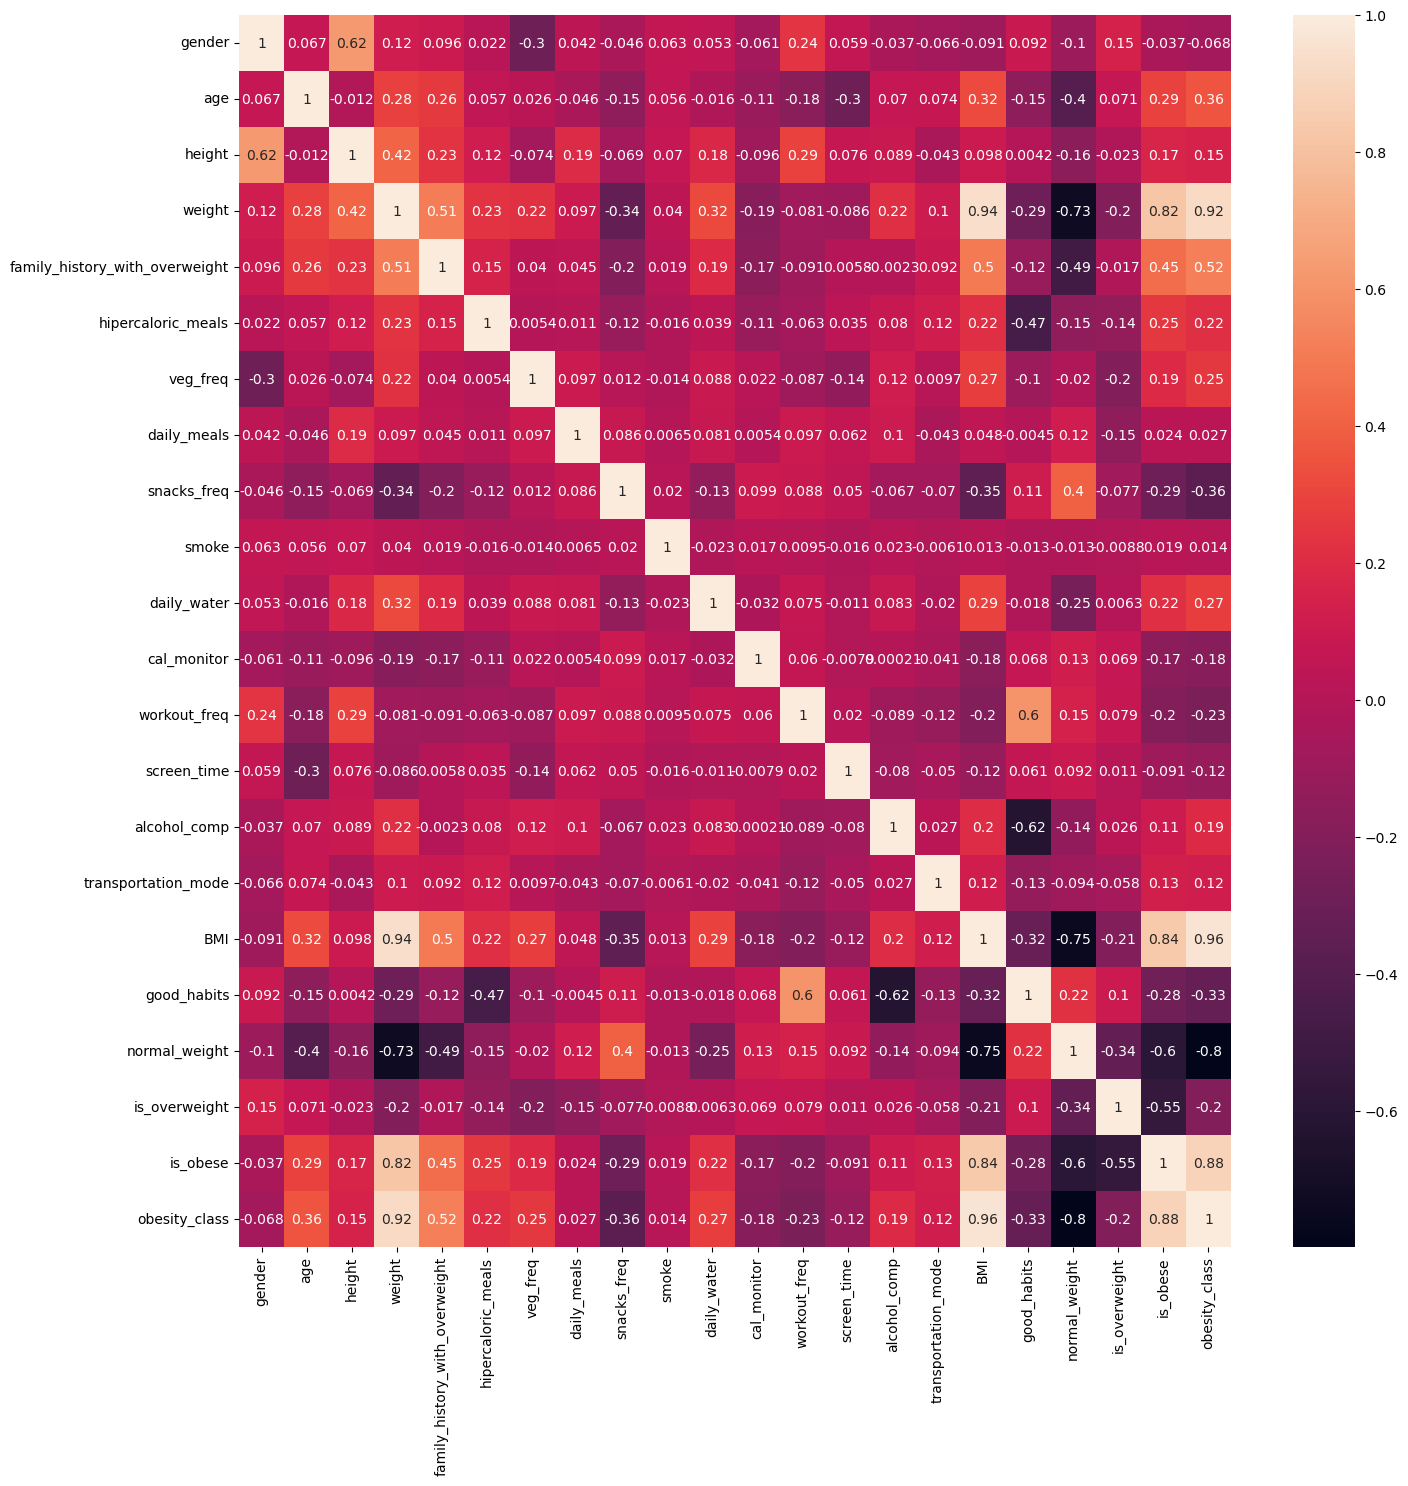

In [546]:
df_corr= train.corr()
plt.figure(figsize=(16,16))
sns.heatmap(df_corr,annot=True)

In [547]:
df_corr.is_obese.sort_values(ascending=False)

is_obese                          1.00
obesity_class                     0.88
BMI                               0.84
weight                            0.82
family_history_with_overweight    0.45
age                               0.29
hipercaloric_meals                0.25
daily_water                       0.22
veg_freq                          0.19
height                            0.17
transportation_mode               0.13
alcohol_comp                      0.11
daily_meals                       0.02
smoke                             0.02
gender                           -0.04
screen_time                      -0.09
cal_monitor                      -0.17
workout_freq                     -0.20
good_habits                      -0.28
snacks_freq                      -0.29
is_overweight                    -0.55
normal_weight                    -0.60
Name: is_obese, dtype: float64

As we created the categories overweight and obese to group the diferentes classes in target, we can observe for is_obese feature BMI is highly correlated. The analysis also show that other factors such as family_histoy_with_overweight, age and hipercaloric_meals are correlated with this category.

The reason to group obesity_class into categories is to evaluate the positive/negative correlations between all the variables as the target values imply many others factors, i.e: an obese III person will weight much more than a normal weight person and the correlation analysis in the target value may differ from one to another.

## 5.2 Scaling numerical features

Before building up the model we'll need to standarice numerical features such as weight and height. Models based in distances such as these we'll use in the clustering later on are very sensitive to the magnitudes of the variables so we use the scaling to avoid a malfunctioning of these models.


In [548]:

from sklearn.preprocessing import StandardScaler

# Select numerical features to standarice
features_to_scale = ['age', 'height', 'weight', 'screen_time', 'BMI', 'good_habits','veg_freq','daily_meals','daily_water','workout_freq']
scaler = StandardScaler()

train[features_to_scale] = scaler.fit_transform(train[features_to_scale])


<a id='seccion6'></a>
# **6. Clustering**
<hr style="height:5px;border-width:0;color:orange;background-color:orange">

The purpose behind the clustering is to sectorize differents paterns of people according to the three categories we created (Normal weight, overweight and Obese). We will examinate the paterns behind these groups to better understand the people's behavior 

In [549]:
# Importa las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [550]:
# extract a df by each group to be clustered: normal_weight, overweight and obese

normal_weight_df = train[train['normal_weight']==True].drop(columns=['normal_weight','is_overweight','is_obese'])
overweight_df = train[train['is_overweight']==True].drop(columns=['normal_weight','is_overweight','is_obese'])
obese_df = train[train['is_obese']==True].drop(columns=['normal_weight','is_overweight','is_obese'])

# creation of a dictionary to store the dataframes to operate later on

dict_df = {'normal_weight':normal_weight_df,'overweight':overweight_df,'obese':obese_df}

normal_weight_df


gender   age  height  weight  family_history_with_overweight  \
1       False -1.03   -1.61   -1.17                            True   
2       False -1.03    0.13   -1.43                            True   
5        True -1.00    0.55   -1.38                            True   
11       True -0.32   -0.00   -0.68                            True   
14      False -0.68   -1.49   -1.47                           False   
...       ...   ...     ...     ...                             ...   
20740   False -0.68   -1.26   -1.47                           False   
20742   False -0.74    0.21   -1.39                            True   
20745   False -0.68    0.49   -1.44                           False   
20746   False -1.03   -1.03   -0.91                            True   
20754    True -1.03    0.11   -1.44                           False   

       hipercaloric_meals  veg_freq  daily_meals  snacks_freq  smoke  \
1                    True     -0.79         0.33            2  False   
2                    True     -0.79        -2.44            1  False   
5                    True      0.97         0.33            1  False   
11                  False     -0.79         0.33            0  False   
14                  False     -0.79        -2.44            1  False   
...                   ...       ...          ...          ...    ...   
20740               False     -0.79         0.33            1  False   
20742                True      0.97         0.33            2  False   
20745                True      0.97         0.33            2  False   
20746                True      0.97         0.33            1  False   
20754                True      0.97         1.71            2  False   

       daily_water  cal_monitor  workout_freq  screen_time  alcohol_comp  \
1            -0.05        False          0.02         0.64             0   
2            -0.20        False          0.02         1.76             0   
5             0.18        False          1.17         0.64             1   
11           -0.05        False          1.17         0.64             0   
14           -1.69        False          2.32         2.30             0   
...            ...          ...           ...          ...           ...   
20740        -0.05        False          1.17        -1.02             1   
20742        -1.33        False          1.17         0.31             0   
20745         1.14        False          1.17         0.64             1   
20746        -0.05        False          0.02         0.64             1   
20754        -1.69        False          1.17         0.64             1   

       transportation_mode   BMI  good_habits  obesity_class  
1                        1 -0.82         0.52              1  
2                        1 -1.57         0.52              0  
5                        1 -1.61         0.52              0  
11                       0 -0.72         4.61              1  
14                       0 -1.24         3.25              1  
...                    ...   ...          ...            ...  
20740                    1 -1.30         1.89              1  
20742                    1 -1.55         1.89              0  
20745                    1 -1.66         0.52              0  
20746                    1 -0.67        -0.84              1  
20754                    1 -1.58         0.52              0  

[5605 rows x 19 columns]

## **6.1 PCA & DBSCAN**

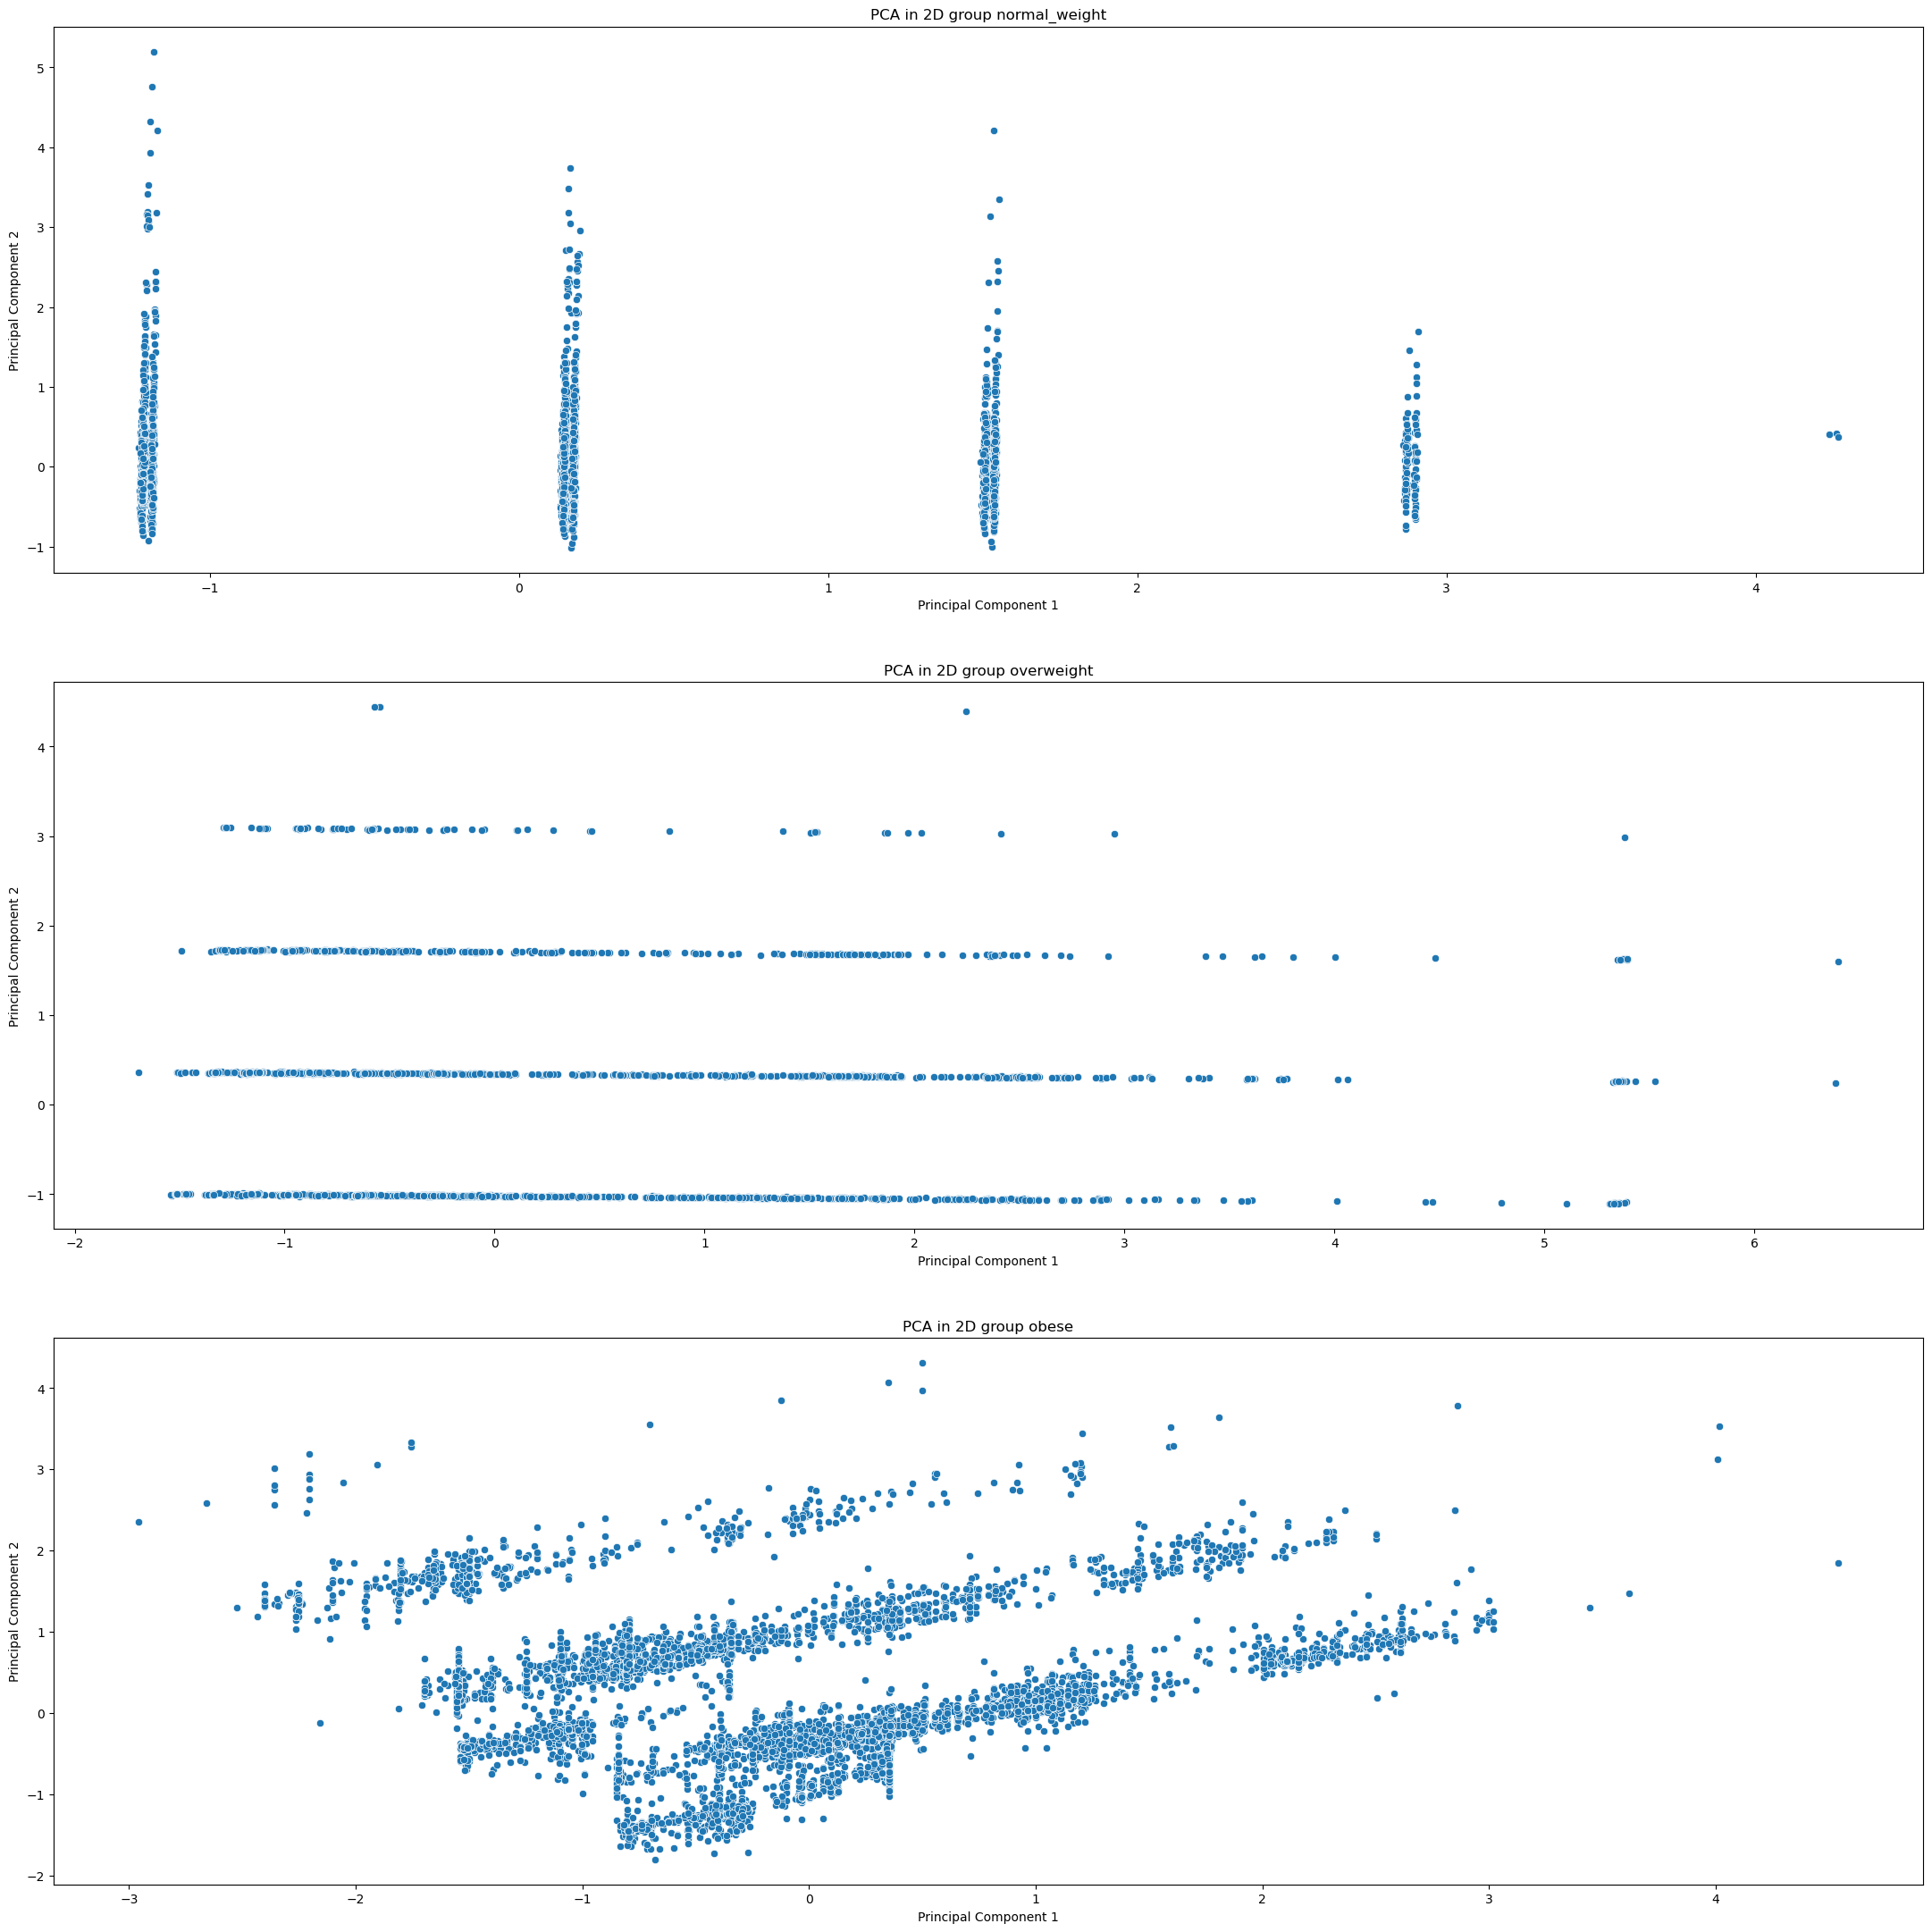

In [551]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

# Creation of a dictionary to record the output of PCAs
pca_results = {}

#Creating main plot
plt.figure(figsize=(27,27))
i = 0
for key, df_group in dict_df.items():
    # Extract the features to be used in the PCA
    scaled_data = df_group[['gender', 'BMI', 'age', 'good_habits']]

    # Aply PCA in 2D
    pca = PCA(n_components=2)
    components = pca.fit_transform(scaled_data)

    # Creation and record of the output in the pca_results dictionary
    pca_df = pd.DataFrame(data=components, columns=['Principal Component 1', 'Principal Component 2'])
    pca_results[key] = pca_df


     # ploting the results of PCA
    plt.subplot(3, 1, (i+1))
    sns.scatterplot(data=pca_df, x='Principal Component 1', y='Principal Component 2')
    plt.title(f'PCA in 2D group {key}')
    i += 1
plt.show()


In [552]:
# Execution of DBSCAN cluster method

# Instanciation of DBSCAN model
from sklearn.cluster import DBSCAN

dbscan_normal= DBSCAN(eps=0.5, min_samples=20)
dbscan_overweight= DBSCAN(eps=0.5, min_samples=55)
dbscan_obese= DBSCAN(eps=0.27, min_samples=230)


# Adjust to the pca results data

cluster_normal= dbscan_normal.fit_predict(pca_results['normal_weight'])
cluster_overweight= dbscan_overweight.fit_predict(pca_results['overweight'])
cluster_obese= dbscan_obese.fit_predict(pca_results['obese'])

# Add cluster labels to the PCA results
pca_results['normal_weight']['Cluster'] = cluster_normal
pca_results['overweight']['Cluster'] = cluster_overweight
pca_results['obese']['Cluster'] = cluster_obese

# Add cluster labels to initial dataframes
normal_weight_df['Cluster']= dbscan_normal.labels_
overweight_df['Cluster']= dbscan_overweight.labels_
obese_df['Cluster']= dbscan_obese.labels_

# Normal Weight
fig_normal = px.scatter(pca_results['normal_weight'], x='Principal Component 1', y='Principal Component 2', color='Cluster', title='Normal Weight Clustering', width=800, height=600)
fig_normal.show()

# Overweight
fig_overweight = px.scatter(pca_results['overweight'], x='Principal Component 1', y='Principal Component 2', color='Cluster', title='Overweight Clustering', width=800, height=600)
fig_overweight.show()

# Obese
fig_obese = px.scatter(pca_results['obese'], x='Principal Component 1', y='Principal Component 2', color='Cluster', title='Obese Clustering', width=800, height=600)
fig_obese.show()



In [553]:
# add % of noise in each df and the % of observations for each cluster for each dataframe

# Normal Weight
normal_weight_df['perc_noise'] = (normal_weight_df['Cluster'] == -1).sum() / len(normal_weight_df) * 100
for cluster in range(0,normal_weight_df['Cluster'].unique().max()):
        perc_cluster = (normal_weight_df['Cluster'] == cluster).sum() / len(normal_weight_df) * 100
        normal_weight_df.loc[normal_weight_df['Cluster'] == cluster, 'perc_dom_cluster'] = perc_cluster
    
# Overweight
overweight_df['perc_noise'] = (overweight_df['Cluster'] == -1).sum() / len(overweight_df) * 100
for cluster in range(0,overweight_df['Cluster'].unique().max()):
        perc_cluster = (overweight_df['Cluster'] == cluster).sum() / len(overweight_df) * 100
        overweight_df.loc[overweight_df['Cluster'] == cluster, 'perc_dom_cluster'] = perc_cluster


# Obese
obese_df['perc_noise'] = (obese_df['Cluster'] == -1).sum() / len(obese_df) * 100
for cluster in range(0,obese_df['Cluster'].unique().max()):
        perc_cluster = (obese_df['Cluster'] == cluster).sum() / len(obese_df) * 100
        obese_df.loc[obese_df['Cluster'] == cluster, 'perc_dom_cluster'] = perc_cluster
    

In [554]:
obese_df

gender   age  height  weight  family_history_with_overweight  \
3       False -0.51    0.12    1.64                            True   
6        True  1.06    0.62    0.94                            True   
7        True  1.06    0.57    1.15                            True   
9       False  0.38   -0.70    0.89                            True   
12       True -1.03    1.27    0.77                            True   
...       ...   ...     ...     ...                             ...   
20751   False -0.49   -1.09    1.73                            True   
20752   False  2.84   -1.67   -0.39                            True   
20753    True  0.23    0.76    1.00                            True   
20755    True -0.66    1.37    0.67                            True   
20757    True  0.50    1.33    1.15                            True   

       hipercaloric_meals  veg_freq  daily_meals  snacks_freq  smoke  \
3                    True      0.97         0.33            1  False   
6                    True     -0.79         0.33            1  False   
7                    True     -2.56         0.33            1  False   
9                    True      0.97         0.33            1  False   
12                   True     -0.79        -1.06            1  False   
...                   ...       ...          ...          ...    ...   
20751                True      0.97         0.33            1  False   
20752                True     -0.79         0.33            1  False   
20753                True      0.97         0.33            1  False   
20755                True     -0.79         0.33            1  False   
20757                True      0.97         0.33            1  False   

       daily_water  cal_monitor  workout_freq  screen_time  alcohol_comp  \
3            -0.58        False          0.02         0.27             1   
6            -0.05        False         -1.14         0.13             1   
7            -0.05        False          0.02        -1.02             1   
9             0.99        False         -1.14        -0.66             1   
12            0.82        False          0.02        -0.11             0   
...            ...          ...           ...          ...           ...   
20751         1.33        False          1.17        -0.79             1   
20752        -1.48        False         -1.14        -0.16             1   
20753         0.20        False          0.02        -0.70             1   
20755        -0.05        False          0.02         0.97             0   
20757        -0.04        False          0.02         0.16             1   

       transportation_mode  BMI  good_habits  obesity_class  Cluster  \
3                        1 1.75        -0.84              6        0   
6                        1 0.76        -0.84              5        0   
7                        1 1.00        -0.84              5        0   
9                        1 1.34        -0.84              6        0   
12                       1 0.33         0.52              4        1   
...                    ...  ...          ...            ...      ...   
20751                    1 2.58         0.52              6        3   
20752                    1 0.22        -0.84              4        2   
20753                    1 0.76        -0.84              5        0   
20755                    1 0.20         0.52              5        1   
20757                    1 0.67        -0.84              5        0   

       perc_noise  perc_dom_cluster  
3           10.79             59.46  
6           10.79             59.46  
7           10.79             59.46  
9           10.79             59.46  
12          10.79             15.98  
...           ...               ...  
20751       10.79              7.71  
20752       10.79              3.44  
20753       10.79             59.46  
20755       10.79             15.98  
20757       10.79             59.46  

[10204 rows x 22 columns]

## **6.2 Inverse transform & Decoding**

In [555]:
# inverse transform to reverse the scalar transformation and understand in initial magnitudes the data and clusters
normal_weight_df[features_to_scale] = scaler.inverse_transform(normal_weight_df[features_to_scale])
overweight_df[features_to_scale] = scaler.inverse_transform(overweight_df[features_to_scale])
obese_df[features_to_scale] = scaler.inverse_transform(obese_df[features_to_scale])

normal_weight_df

gender   age  height  weight  family_history_with_overweight  \
1       False 18.00    1.56   57.00                            True   
2       False 18.00    1.71   50.17                            True   
5        True 18.13    1.75   51.55                            True   
11       True 22.00    1.70   70.00                            True   
14      False 20.00    1.57   49.00                           False   
...       ...   ...     ...     ...                             ...   
20740   False 20.00    1.59   49.00                           False   
20742   False 19.64    1.72   51.15                            True   
20745   False 19.98    1.74   49.93                           False   
20746   False 18.00    1.61   64.00                            True   
20754    True 18.00    1.71   50.00                           False   

       hipercaloric_meals  veg_freq  daily_meals  snacks_freq  smoke  \
1                    True      2.00         3.00            2  False   
2                    True      2.00         1.00            1  False   
5                    True      3.00         3.00            1  False   
11                  False      2.00         3.00            0  False   
14                  False      2.00         1.00            1  False   
...                   ...       ...          ...          ...    ...   
20740               False      2.00         3.00            1  False   
20742                True      3.00         3.00            2  False   
20745                True      3.00         3.00            2  False   
20746                True      3.00         3.00            1  False   
20754                True      3.00         4.00            2  False   

       daily_water  cal_monitor  workout_freq  screen_time  alcohol_comp  \
1             2.00        False          1.00         1.00             0   
2             1.91        False          1.00         1.67             0   
5             2.14        False          2.00         1.00             1   
11            2.00        False          2.00         1.00             0   
14            1.00        False          3.00         2.00             0   
...            ...          ...           ...          ...           ...   
20740         2.00        False          2.00         0.00             1   
20742         1.22        False          2.00         0.81             0   
20745         2.72        False          2.00         1.00             1   
20746         2.00        False          1.00         1.00             1   
20754         1.00        False          2.00         1.00             1   

       transportation_mode   BMI  good_habits  obesity_class  Cluster  \
1                        1 23.42         1.00              1        0   
2                        1 17.13         1.00              0        0   
5                        1 16.86         1.00              0        0   
11                       0 24.22         4.00              1       -1   
14                       0 19.88         3.00              1        1   
...                    ...   ...          ...            ...      ...   
20740                    1 19.38         2.00              1        3   
20742                    1 17.31         2.00              0        3   
20745                    1 16.44         1.00              0        0   
20746                    1 24.69         0.00              1        2   
20754                    1 17.10         1.00              0        0   

       perc_noise  perc_dom_cluster  
1            0.55             42.32  
2            0.55             42.32  
5            0.55             42.32  
11           0.55               NaN  
14           0.55              2.07  
...           ...               ...  
20740        0.55               NaN  
20742        0.55               NaN  
20745        0.55             42.32  
20746        0.55             35.41  
20754        0.55             42.32  

[5605 rows x 22 columns]

In [556]:
# reverse decode of the obesity class
reverse_obesity_class_mapping = {v: k for k, v in obesity_class_mapping.items()}

# Reverse decode of the boolean features
reverse_gender_mapping = {True: 'Male', False: 'Female'}
reverse_family_history_mapping = {True: 'yes', False: 'no'}
reverse_hipercaloric_mapping = {True: 'yes', False: 'no'}
reverse_smoke_mapping = {True: 'yes', False: 'no'}
reverse_cal_monitor_mapping = {True: 'yes', False: 'no'}

# Reverse decode of the frecuency features
reverse_snacks_freq_mapping = {0: 'no', 1: 'Sometimes', 2: 'Frequently', 3: 'Always'}
reverse_alcohol_comp_mapping = {0: 'no', 1: 'Sometimes', 2: 'Frequently'}

# Reverse decode of the transportation mode
reverse_transportation_mapping = {0: 'Walking/Bike', 1: 'Motorbike/Public Transportation/Automobile'}

# Creation of a dictionary to store all the reverse mappings to operate later on
reverse_mapping = {
    'obesity_class': reverse_obesity_class_mapping,
    'gender': reverse_gender_mapping,
    'family_history_with_overweight': reverse_family_history_mapping,
    'hipercaloric_meals': reverse_hipercaloric_mapping,
    'smoke': reverse_smoke_mapping,
    'cal_monitor': reverse_cal_monitor_mapping,
    'snacks_freq': reverse_snacks_freq_mapping,
    'alcohol_comp': reverse_alcohol_comp_mapping,
    'transportation_mode': reverse_transportation_mapping
}

In [557]:
# Apply the reverse mappings to the dataframes
for col, mapping in reverse_mapping.items():

    for k,v in dict_df.items():
        v[col] = v[col].map(mapping)


In [558]:
obese_df.query('Cluster == 0').describe(include='all')

gender     age  height  weight family_history_with_overweight  \
count     6067 6067.00 6067.00 6067.00                           6067   
unique       2     NaN     NaN     NaN                              2   
top     Female     NaN     NaN     NaN                            yes   
freq      3517     NaN     NaN     NaN                           6060   
mean       NaN   25.46    1.71  113.11                            NaN   
std        NaN    2.87    0.09   11.70                            NaN   
min        NaN   18.00    1.50   63.00                            NaN   
25%        NaN   23.65    1.63  105.34                            NaN   
50%        NaN   25.98    1.71  111.94                            NaN   
75%        NaN   26.00    1.77  120.20                            NaN   
max        NaN   34.29    1.98  165.06                            NaN   

       hipercaloric_meals  veg_freq  daily_meals snacks_freq smoke  \
count                6067   6067.00      6067.00        6067  6067   
unique                  1       NaN          NaN           3     2   
top                   yes       NaN          NaN   Sometimes    no   
freq                 6067       NaN          NaN        6031  5969   
mean                  NaN      2.68         2.90         NaN   NaN   
std                   NaN      0.54         0.41         NaN   NaN   
min                   NaN      1.00         1.00         NaN   NaN   
25%                   NaN      2.00         3.00         NaN   NaN   
50%                   NaN      3.00         3.00         NaN   NaN   
75%                   NaN      3.00         3.00         NaN   NaN   
max                   NaN      3.00         4.00         NaN   NaN   

        daily_water cal_monitor  workout_freq  screen_time alcohol_comp  \
count       6067.00        6067       6067.00      6067.00         6067   
unique          NaN           2           NaN          NaN            2   
top             NaN          no           NaN          NaN    Sometimes   
freq            NaN        6063           NaN          NaN         6051   
mean           2.23         NaN          0.43         0.51          NaN   
std            0.56         NaN          0.50         0.46          NaN   
min            1.00         NaN         -0.00         0.00          NaN   
25%            2.00         NaN         -0.00         0.10          NaN   
50%            2.36         NaN         -0.00         0.45          NaN   
75%            2.68         NaN          1.00         0.78          NaN   
max            3.00         NaN          1.00         2.00          NaN   

                               transportation_mode     BMI  good_habits  \
count                                         6067 6067.00      6067.00   
unique                                           2     NaN          NaN   
top     Motorbike/Public Transportation/Automobile     NaN          NaN   
freq                                          6063     NaN          NaN   
mean                                           NaN   38.60         0.00   
std                                            NaN    3.84         0.00   
min                                            NaN   25.24         0.00   
25%                                            NaN   36.06         0.00   
50%                                            NaN   38.92         0.00   
75%                                            NaN   41.56         0.00   
max                                            NaN   54.99         0.00   

           obesity_class  Cluster  perc_noise  perc_dom_cluster  
count               6067  6067.00     6067.00           6067.00  
unique                 3      NaN         NaN               NaN  
top     Obesity_Type_III      NaN         NaN               NaN  
freq                3268      NaN         NaN               NaN  
mean                 NaN     0.00       10.79             59.46  
std                  NaN     0.00        0.00              0.00  
min                  NaN  

In [559]:

def summarize_cluster(df, cluster_number):
    # filter the data by the cluster number
    cluster_data = df.query(f'Cluster == {cluster_number}')
    
    # extrat the mean values of all the columns
    mean_values = cluster_data.describe(include=[np.number]).loc['mean']
    
    # extract the categorical data info
    top_values = cluster_data.describe(include='all').loc['top']
   
    counter= cluster_data.describe(include='all').loc['count']
    freq= cluster_data.describe(include='all').loc['freq']
    perc_domin= cluster_data.describe(include='all').loc['freq']/cluster_data.describe(include='all').loc['count']

    
    # merge it into df
    result_df = pd.DataFrame({'Mean': mean_values, 'Top': top_values,' perc dom class':perc_domin})
    # fill NA values
    result_df['Top'] = result_df['Top'].fillna('N/A')
    
    return result_df



In [560]:
summarize_cluster(obese_df,2).T


BMI Cluster   age alcohol_comp cal_monitor daily_meals  \
Mean            34.19    2.00 38.30          NaN         NaN        2.75   
Top               N/A     N/A   N/A    Sometimes          no         N/A   
 perc dom class   NaN     NaN   NaN         0.97        1.00         NaN   

                daily_water family_history_with_overweight  gender  \
Mean                   1.75                            NaN     NaN   
Top                     N/A                            yes  Female   
 perc dom class         NaN                           0.99    0.62   

                good_habits height hipercaloric_meals   obesity_class  \
Mean                   0.00   1.63                NaN             NaN   
Top                     N/A    N/A                yes  Obesity_Type_I   
 perc dom class         NaN    NaN               1.00            0.67   

                perc_dom_cluster perc_noise screen_time smoke snacks_freq  \
Mean                        3.44      10.79        0.10   NaN         NaN   
Top                          N/A        N/A         N/A    no   Sometimes   
 perc dom class              NaN        NaN         NaN  1.00        0.97   

                                        transportation_mode veg_freq weight  \
Mean                                                    NaN     2.22  92.35   
Top              Motorbike/Public Transportation/Automobile      N/A    N/A   
 perc dom class                                        1.00      NaN    NaN   

                workout_freq  
Mean                    0.39  
Top                      N/A  
 perc dom class          NaN

In [561]:
normal_weight_df.query('Cluster == 2').describe(include='all')

gender     age  height  weight family_history_with_overweight  \
count     1985 1985.00 1985.00 1985.00                           1985   
unique       2     NaN     NaN     NaN                              2   
top     Female     NaN     NaN     NaN                             no   
freq      1233     NaN     NaN     NaN                           1092   
mean       NaN   19.91    1.66   55.30                            NaN   
std        NaN    2.57    0.09    9.56                            NaN   
min        NaN   14.00    1.45   39.10                            NaN   
25%        NaN   18.00    1.59   50.00                            NaN   
50%        NaN   19.00    1.66   53.00                            NaN   
75%        NaN   21.00    1.72   62.00                            NaN   
max        NaN   34.00    1.98   87.00                            NaN   

       hipercaloric_meals  veg_freq  daily_meals snacks_freq smoke  \
count                1985   1985.00      1985.00        1985  1985   
unique                  1       NaN          NaN           3     2   
top                   yes       NaN          NaN   Sometimes    no   
freq                 1985       NaN          NaN        1274  1966   
mean                  NaN      2.41         2.72         NaN   NaN   
std                   NaN      0.60         0.82         NaN   NaN   
min                   NaN      1.00         1.00         NaN   NaN   
25%                   NaN      2.00         3.00         NaN   NaN   
50%                   NaN      2.00         3.00         NaN   NaN   
75%                   NaN      3.00         3.00         NaN   NaN   
max                   NaN      3.00         4.00         NaN   NaN   

        daily_water cal_monitor  workout_freq  screen_time alcohol_comp  \
count       1985.00        1985       1985.00      1985.00         1985   
unique          NaN           2           NaN          NaN            2   
top             NaN          no           NaN          NaN    Sometimes   
freq            NaN        1864           NaN          NaN         1942   
mean           1.67         NaN          0.62         0.76          NaN   
std            0.56         NaN          0.49         0.65          NaN   
min            1.00         NaN         -0.00         0.00          NaN   
25%            1.00         NaN         -0.00         0.00          NaN   
50%            2.00         NaN          1.00         1.00          NaN   
75%            2.00         NaN          1.00         1.00          NaN   
max            3.00         NaN          1.00         2.00          NaN   

                               transportation_mode     BMI  good_habits  \
count                                         1985 1985.00      1985.00   
unique                                           2     NaN          NaN   
top     Motorbike/Public Transportation/Automobile     NaN          NaN   
freq                                          1933     NaN          NaN   
mean                                           NaN   20.02         0.00   
std                                            NaN    2.89         0.00   
min                                            NaN   13.29         0.00   
25%                                            NaN   17.50         0.00   
50%                                            NaN   19.75         0.00   
75%                                            NaN   22.31         0.00   
max                                            NaN   32.88         0.00   

        obesity_class  Cluster  perc_noise  perc_dom_cluster  
count            1985  1985.00     1985.00           1985.00  
unique              2      NaN         NaN               NaN  
top     Normal_Weight      NaN         NaN               NaN  
freq             1131      NaN         NaN               NaN  
mean              NaN     2.00        0.55             35.41  
std               NaN     0.00        0.00              0.00  
min               NaN     2.00        0.55     

## **6.3 Summary Clustering**

After reviwing in detail all the clusters here bellow it's shown the summary:

**NORMAL WEIGHT GROUP** 0.5% noise

---

- **NORMAL YOUNGSTERS - Cluster 0 (42%):** Average age 20 years, balanced gender, **half of them have a family history of overweight**, not very good habits (1), occasional alcohol consumption, hypercaloric food, and no physical effort for transportation (motorbike, public transport, car). Exercise between 1 and 2 times a week (average 1.32 times).

- **LAZY NORMAL YOUNGSTERS - Cluster 2 (35%):** Similar to cluster 0 but with the difference that they never exercise (none or once a week).

- **SUPER YOUNGSTERS - Cluster 1 (2%):** Average age 20 years, balanced gender, half of them have a family history of overweight, but with good habits (NO alcohol consumption or hypercaloric foods, and half of them occasionally snack). Exercise between 2 and 3 times a week (average 2.30 times).

- **URBAN SUPER YOUNGSTERS - Cluster 3 (20%):** Similar to cluster 1, but exercising less (average 1.87 times a week). Occasionally consume hypercaloric foods, and the majority don't drink alcohol. Different from SUPER YOUNGSTERS maybe for the influence of living in a great city.



**OVERWEIGHT GROUP** 2% noise

--- 

- **JUNIORS WITH BAD HABITS - Cluster 0 (43%):** Average age 24 years, somewhat balanced gender (more men), with bad habits:occasional alcohol consumption, consume hypercaloric meals, and hardly exercise (0.65 times) or travel by bike or walking. **Most of them have a family history of overweight*.
- **NORMAL JUNIORS - Cluster 1 (39%):** Similar to cluster 0 but taking slightly better care of themselves (slightly more exercise (1.34 times) and consuming less alcohol and hypercaloric food).
- **HEALTH-CONSCIOUS JUNIORS - Cluster 2 (14%):** Young adults who moderately take care of themselves (exercise more, half of them don't drink alcohol or consume hypercaloric foods).
- **ABSTEMIOUS HEALTH-CONSCIOUS JUNIORS - Cluster 3 (1.5%):** Gym-going youths, 20 years old, don't consume alcohol or hypercaloric foods, watch their diet, and are more men than women (64%).

**OBESE GROUP** 10% noise

---

- **COMMON GREAT OBESE - Cluster 0 (60%):** Average age 25 years, all have a history of overweight, hypercaloric meals and snacks, and moderate alcohol consumption. Regarding exercise, hardly exercise once a week. The most common class is Obesity type III (maximum).

- **YOUNG OBESE MEN - Cluster 1 (11%):** YOUNG MEN (average age 23 years) mostly with Obesity type I. Consume hypercaloric foods, snacks but 2/3 claim not to consume alcohol. Exercise at least once a week.

- **MIDDLE-AGE OBESE WOMEN - Cluster 2 (3.5%):** Mostly non-young WOMEN (average age 38 years). All have a history of overweight, hypercaloric meals and snacks, and moderate alcohol consumption. Regarding exercise, hardly exercise once a week. The most common class is Obesity type I.

- **YOUNG OBESE MEN TRYING TO CHANGE Cluster 3 (8%):** YOUNG WOMEN (average age 21 years). All have a history of overweight, hypercaloric meals and snacks, and moderate alcohol consumption. **Exercise twice a week. All have Obesity type III.**

- **ABSTEMIOUS HEALTH-CONSCIOUS OBESE JUNIORS - Cluster 4 (3%):** Mostly young MEN (average age 23 years). Don't drink alcohol, exercise 2 to 3 times a week but consume snacks and hypercaloric foods. Also, have a history of overweight.


<a id='seccion7'></a>
# **7. Classification Modeling: LightGBM**
<hr style="height:5px;border-width:0;color:orange;background-color:orange">


## Optimization with optuna

In [562]:
# !pip install lightgbm
# !pip install optuna

In [563]:
import optuna
import lightgbm as lgb
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

# Split the data into train and test

X = train.drop(columns=['obesity_class'])
y = train['obesity_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# definition of space of parameters to adjust
def objective(trial):
    param = {
        'objective': 'multiclass',
        'num_class': 7,  
        'verbosity': -1,
        'boosting_type':'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 30, 200),
        'max_depth': trial.suggest_int('max_depth', 2, 25),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 300),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'min_split_gain': trial.suggest_float('min_split_gain', 0.0, 0.3)
    }
    model = lgb.LGBMClassifier(**param)
    model.fit(X_train, y_train)
    preds = model.predict_proba(X_test)
    log_loss_value = log_loss(y_test, preds)
    return log_loss_value

# Aplication of Bayesian Optimization with optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=300)

print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)


[I 2024-05-06 12:39:00,576] A new study created in memory with name: no-name-a89d66e9-f801-48d4-9e1c-a1d92ae4c213
[I 2024-05-06 12:39:02,106] Trial 0 finished with value: 0.13884128099276125 and parameters: {'num_leaves': 133, 'max_depth': 3, 'learning_rate': 0.11997808876121732, 'n_estimators': 453, 'min_child_samples': 53, 'subsample': 0.8557216219795611, 'colsample_bytree': 0.9160807336408647, 'reg_alpha': 0.7032206902736852, 'reg_lambda': 0.4212203675916404, 'min_split_gain': 0.15699830928494116}. Best is trial 0 with value: 0.13884128099276125.
[I 2024-05-06 12:39:04,088] Trial 1 finished with value: 0.14043993043469957 and parameters: {'num_leaves': 198, 'max_depth': 6, 'learning_rate': 0.10702043526228612, 'n_estimators': 296, 'min_child_samples': 18, 'subsample': 0.6490693888795225, 'colsample_bytree': 0.33888579555699866, 'reg_alpha': 0.16987425085585217, 'reg_lambda': 0.37825704097557844, 'min_split_gain': 0.11037548925163287}. Best is trial 0 with value: 0.13884128099276125.

[I 2024-05-06 12:39:29,569] Trial 14 finished with value: 0.16275148155427285 and parameters: {'num_leaves': 77, 'max_depth': 2, 'learning_rate': 0.04705080825204064, 'n_estimators': 175, 'min_child_samples': 90, 'subsample': 0.707116759719773, 'colsample_bytree': 0.6429215597867802, 'reg_alpha': 0.3028866600237871, 'reg_lambda': 0.5644791359200916, 'min_split_gain': 0.059375407619099985}. Best is trial 8 with value: 0.1380250032586453.
[I 2024-05-06 12:39:31,268] Trial 15 finished with value: 0.16260458544072662 and parameters: {'num_leaves': 46, 'max_depth': 19, 'learning_rate': 0.1978630103738035, 'n_estimators': 257, 'min_child_samples': 58, 'subsample': 0.5752338486936344, 'colsample_bytree': 0.8378269185129708, 'reg_alpha': 0.6073272676577861, 'reg_lambda': 0.20627852545710978, 'min_split_gain': 0.002539684000778697}. Best is trial 8 with value: 0.1380250032586453.
[I 2024-05-06 12:39:33,894] Trial 16 finished with value: 0.14090096941427152 and parameters: {'num_leaves': 87, 'ma

Number of finished trials: 300
Best trial: {'num_leaves': 194, 'max_depth': 16, 'learning_rate': 0.050781546559349806, 'n_estimators': 307, 'min_child_samples': 113, 'subsample': 0.9521556021074852, 'colsample_bytree': 0.3230856278212427, 'reg_alpha': 0.20226091597627105, 'reg_lambda': 0.3777646774701624, 'min_split_gain': 0.2876563835390326}


In [564]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

best_params = study.best_trial.params
lgbm_classifier = lgb.LGBMClassifier(**best_params)

# Obtener predicciones de validación cruzada
y_pred_cv = cross_val_predict(lgbm_classifier, X, y, cv=5)  # Ajusta el 'cv' según tus necesidades

# Ajustar el modelo a todo el conjunto de datos para la interpretación
lgbm_classifier.fit(X, y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000898 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1575
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 21
[LightGBM] [Info] Start training from score -2.107657
[LightGBM] [Info] Start training from score -1.907167
[LightGBM] [Info] Start training from score -2.146046
[LightGBM] [Info] Start training from score -2.108153
[LightGBM] [Info] Start training from score -1.964755
[LightGBM] [Info] Start training from score -1.855022
[LightGBM] [Info] Start training from score -1.635117
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

LGBMClassifier(colsample_bytree=0.3230856278212427,
               learning_rate=0.050781546559349806, max_depth=16,
               min_child_samples=113, min_split_gain=0.2876563835390326,
               n_estimators=307, num_leaves=194, reg_alpha=0.20226091597627105,
               reg_lambda=0.3777646774701624, subsample=0.9521556021074852)

In [565]:
# Classification report:
from sklearn.metrics import accuracy_score
print(classification_report(y, y_pred_cv))

display(accuracy_score(y,y_pred_cv))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2523
           1       0.95      0.95      0.95      3082
           2       0.90      0.87      0.88      2427
           3       0.88      0.90      0.89      2522
           4       0.97      0.96      0.97      2910
           5       0.97      0.97      0.97      3248
           6       1.00      1.00      1.00      4046

    accuracy                           0.95     20758
   macro avg       0.94      0.94      0.94     20758
weighted avg       0.95      0.95      0.95     20758



0.948405434049523

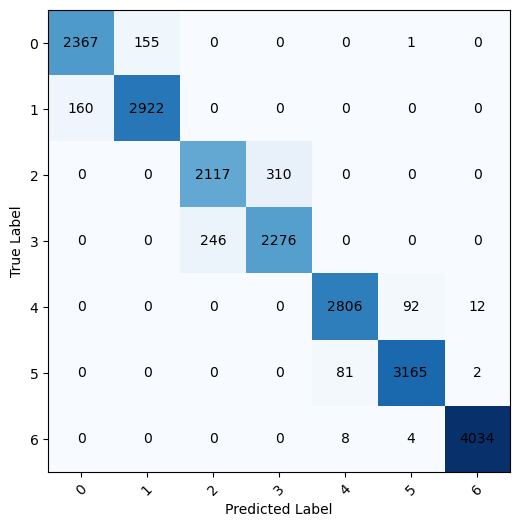

In [566]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
from lightgbm import LGBMClassifier, plot_importance
plt.figure(figsize=(15, 6))
conf_matrix = confusion_matrix(y, y_pred_cv)
conf_labels = [f'{i}' for i in range(conf_matrix.shape[0])]
conf_matrix_df = pd.DataFrame(conf_matrix, columns=conf_labels, index=conf_labels)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.xticks(np.arange(conf_matrix.shape[0]), conf_labels, rotation=45)
plt.yticks(np.arange(conf_matrix.shape[0]), conf_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.grid(False)
plt.show()

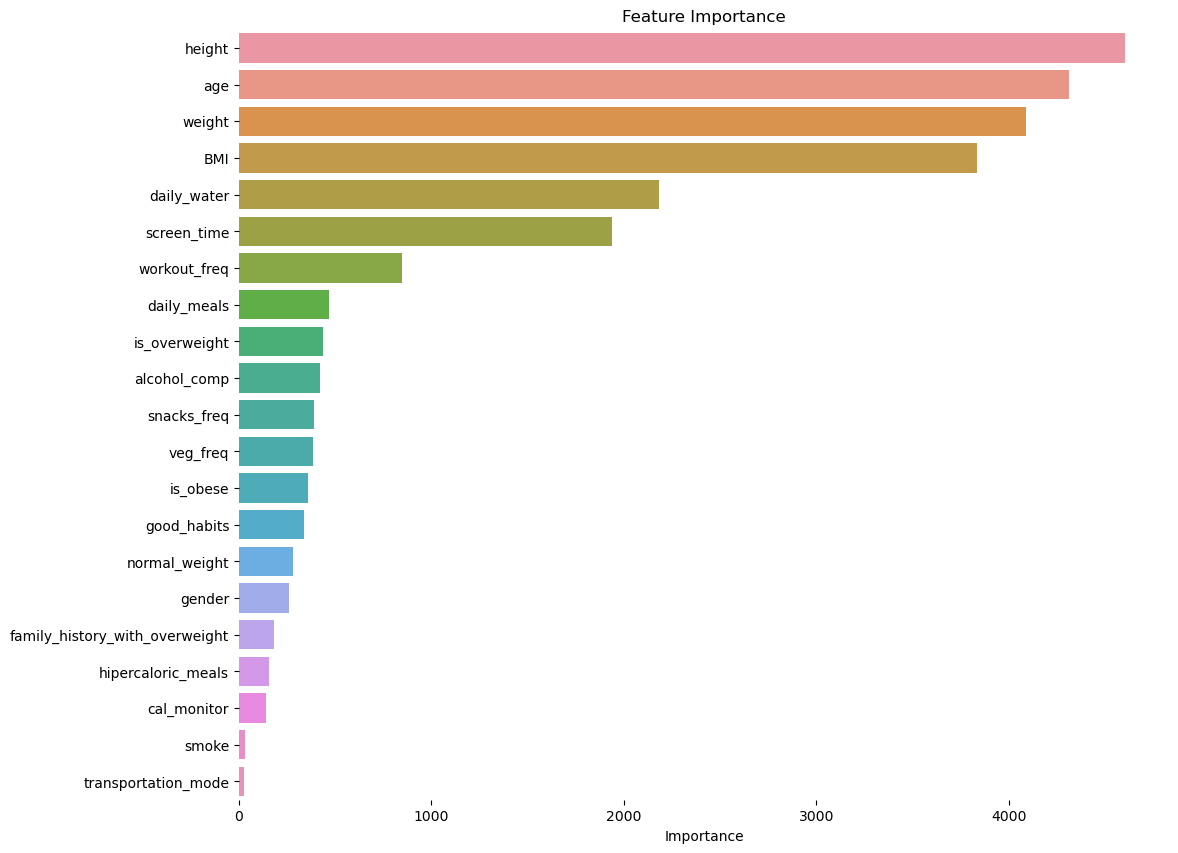

In [567]:
# feature importances
feature_importance = lgbm_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

<a id='seccion8'></a>
# **8. Conclusion**
<hr style="height:5px;border-width:0;color:red;background-color:red">


Based on the dataset we have the feature importance for the model is the height, age and weight which make sense except for the age. 

Regarding the age I believe the models assign that importance for the imbalance in the data we have according to age feature (many of the overweigth/obese people are youngters).

The model predicts with a 95% of accuracy in many cases only having less accuracy in Overweight_type_I and Overweight_type_II.

As the data has been pregenerated with deeplearing data generation techniches and many values are out of range of average normal values (smokers, age...) I believe this is not a true comparison with reality. However regarding the performance of the model with this datased I believe this is a good performace.

